<a href="https://colab.research.google.com/github/Pramuuu/Futurense_ML/blob/main/28_07_24_continuation_advanced_plots____of_all_datasheets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

# for solving problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
# Optional
# for filter warnings
import warnings
warnings.filterwarnings('ignore')
# for better plot visualization
plt.style.use('_mpl-gallery')
FONT = {'fontsize':20, 'fontstyle':'normal', 'fontfamily':'Times New Roman', 'backgroundcolor':'#145A32', 'color':'orange'} # for plot title


In [ ]:
# importing requirement sklearn functions
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, jaccard_score, log_loss


In [ ]:
data = pd.read_excel('/content/Leads Generated.xlsx')
df = pd.DataFrame(data)
df

lead_id        created_time  \
0                          l:3587545764833355 2024-05-02 14:18:00   
1        cc0da387-682c-4530-a79a-1168487410f0 2024-04-30 18:00:07   
2        10045c19-1c8d-4d63-a6bf-62d00a2f50ec 2024-03-21 02:25:55   
3        7e0db362-ebc3-4265-9131-d69bae5eb3f5 2024-03-17 06:40:21   
4        5f74bcc1-08a8-414d-a729-69d5071b4f53 2024-03-20 07:48:39   
...                                       ...                 ...   
32764                      l:1287087698649474 2023-12-29 20:15:00   
32765                       l:752743646765142 2024-01-24 13:37:00   
32766                       l:701943358682733 2024-03-21 06:19:00   
32767  ffd92ee8-f03c-4af0-a4a9-a0e47aff34dc-6 2024-01-04 03:45:00   
32768                      l:1116793499325062 2024-02-01 14:03:00   

                                                 Ad Name  \
0                               USP_S3_never-been-easier   
1                                                     --   
2                                                 Shreya   
3                                                     --   
4                                                 Shreya   
...                                                  ...   
32764                   #9 ( Graphic ) - Study In The US   
32765                            USP_Influencer_videoAd2   
32766                                  USP_RIT_1_Getpaid   
32767  USP_Program_Linkedin_Static_C19_Dual-Course-white   
32768                            USP_Influencer_videoAd1   

                                           Campaign Name  \
0                                USP_2_Lead-gen-1_220124   
1                             USP_Search_APTNTSKA_250124   
2            USP_Video_APTLTSKA_Lead-Gen_Keywords_050324   
3                             USP_Search_APTNTSKA_250124   
4            USP_Video_APTLTSKA_Lead-Gen_Websites_050324   
...                                                  ...   
32764  USP Masterclass Cold [ 31st Oct ] - Higher Int...   
32765      USP_Program_More-Volume_No Logic_India_220124   
32766                      USP_MS + Coop Campaign_240224   
32767                     US_Pathway_2_Lead_gen_3_241123   
32768    USP_Program_More-volume_With-Logic_India_220124   

                                               form_name  platform  \
0      BM - US pathway Webinar Form - More Volume - N...  Facebook   
1                                                    NaN    Google   
2                                                    NaN    Google   
3                                                    NaN    Google   
4                                                    NaN    Google   
...                                                  ...       ...   
32764  BM - US pathway Webinar Form - Higher Intent -...  Facebook   
32765  BM - US pathway Webinar Form - More Volume - N...  Facebook   
32766  BM - US pathway Webinar Form - More Volume - N...  Facebook   
32767               US Pathway Program final Form 110923  LinkedIn   
32768  BM - US pathway Webinar Form - More volume - W...  Facebook   

                                    lead_id.1  \
0                          l:3587545764833355   
1        cc0da387-682c-4530-a79a-1168487410f0   
2        10045c19-1c8d-4d63-a6bf-62d00a2f50ec   
3        7e0db362-ebc3-4265-9131-d69bae5eb3f5   
4        5f74bcc1-08a8-414d-a729-69d5071b4f53   
...                                       ...   
32764                      l:1287087698649474   
32765                       l:752743646765142   
32766                       l:701943358682733   
32767  ffd92ee8-f03c-4af0-a4a9-a0e47aff34dc-6   
32768                      l:1116793499325062   

                       graduation_degree  graduation_percentage  \
0                             b.tech_cse                   70.0   
1                             B.Tech CSE                   80.0   
2                                     PG                   50.0   
3                                 Others                   60.0   
4 

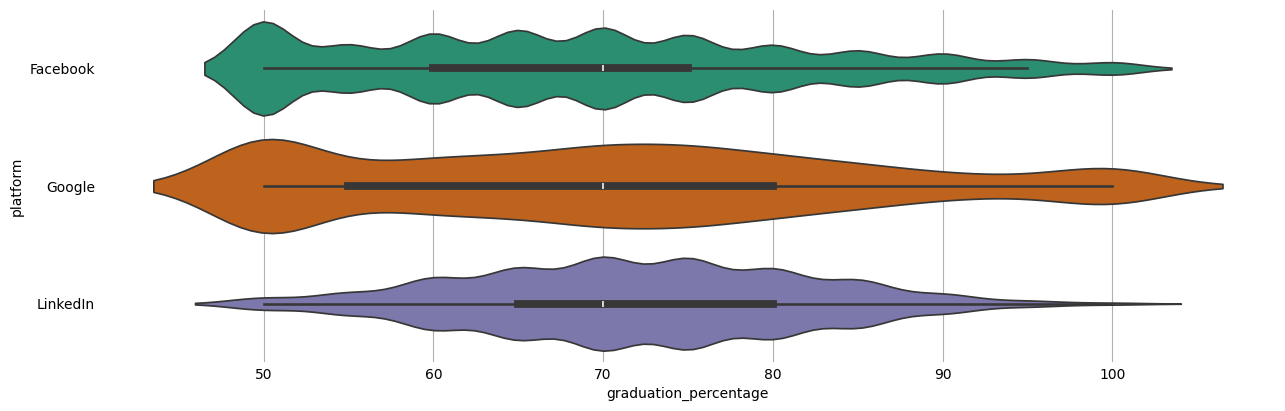

In [ ]:
# @title platform vs graduation_percentage

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['platform'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='graduation_percentage', y='platform', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

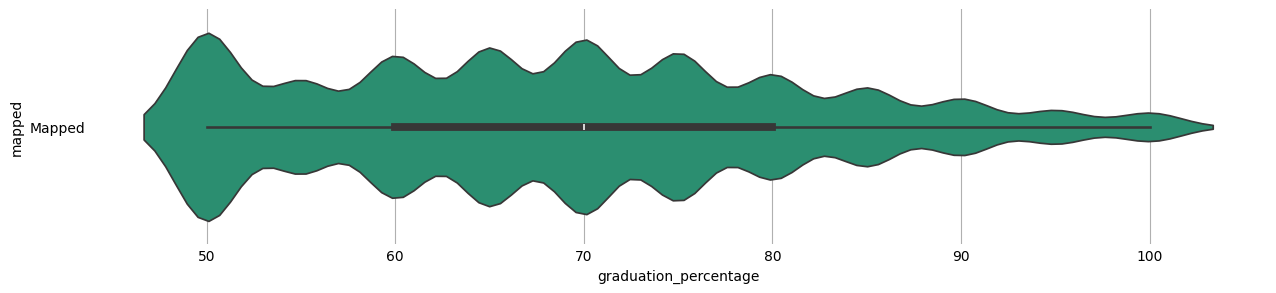

In [ ]:
# @title mapped vs graduation_percentage

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['mapped'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='graduation_percentage', y='mapped', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

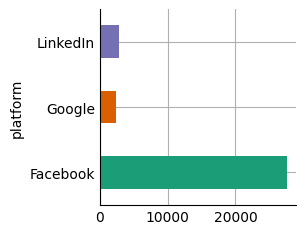

In [ ]:
# @title platform

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('platform').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

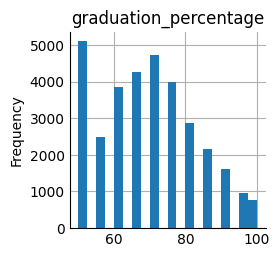

In [ ]:
# @title graduation_percentage

from matplotlib import pyplot as plt
df['graduation_percentage'].plot(kind='hist', bins=20, title='graduation_percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data1 = pd.read_excel('/content/Phone Metrics.xlsx')
df1 = pd.DataFrame(data1)
df1

lead_number        first_name             Lead Id  \
0           2704878            Pranav   l:861701659054416   
1           2288584      Ramakrishnan   l:966563021758786   
2           2721420   Purnima kuppala   l:430457079653387   
3            693703            Sambit                 NaN   
4           2712125     Gokul Krishna  l:1547362259166875   
...             ...               ...                 ...   
260618       703645     Shruti Mathur                 NaN   
260619      2704878            Pranav   l:861701659054416   
260620      2293137      Divya Shukla  l:3609611255969786   
260621      2293667    Dev Bhandarker  l:8106492436034710   
260622      2293838  Shaik Zainnuddin  l:1816060162176982   

        inbound_phone_call_counter  mobile_number  \
0                              NaN            NaN   
1                              NaN            NaN   
2                              NaN            NaN   
3                              NaN            NaN   
4                              NaN            NaN   
...                            ...            ...   
260618                         0.0            NaN   
260619                         3.0            NaN   
260620                         0.0            NaN   
260621                         2.0            NaN   
260622                         0.0            NaN   

        outbound_phone_call_counter           lead_stage  lead_score  \
0                               NaN         Token Amount           1   
1                               NaN  Document Collection           0   
2                               NaN   Counselling Booked           2   
3                               NaN  Document Collection           5   
4                               NaN         Token Amount          10   
...                             ...                  ...         ...   
260618                         14.0         Token Amount          14   
260619                         37.0         Token Amount           1   
260620                         12.0         Token Amount          10   
260621                          4.0   Counselling Booked           1   
260622                          7.0         Token Amount           2   

                  owner                      activity  ...       status  \
0        Ratnesh Mishra   Inbound Phone Call Activity  ...     Answered   
1       Swapnil Awasthi  Outbound Phone Call Activity  ...  NotAnswered   
2          Jatin Luthra   Inbound Phone Call Activity  ...     Answered   
3       Swapnil Awasthi  Outbound Phone Call Activity  ...     Answered   
4          Simran Singh  Outbound Phone Call Activity  ...     Answered   
...                 ...                           ...  ...          ...   
260618      Ayush Dixit  Outbound Phone Call Activity  ...     Answered   
260619   Ratnesh Mishra  Outbound Phone Call Activity  ...  NotAnswered   
260620    Ankur chandra  Outbound Phone Call Activity  ...  NotAnswered   
260621  Suryansh Tiwari   Inbound Phone Call Activity  ...       Missed   
260622       Shrey Goel  Outbound Phone Call Activity  ...  NotAnswered   

       call_duration_sec   calls_done_by contacted           call_time  \
0                    232  SuryanshTiwari       NaN 2024-04-16 16:29:00   
1                      0  DiptikantaJena       NaN 2024-04-17 11:25:00   
2                     18     JatinLuthra       NaN 2024-04-16 10:49:00   
3                     64     ChitwanSoni       NaN 2024-04-17 16:44:00   
4                     12   RatneshMishra       NaN 2024-04-16 14:53:00   
...                  ...             ...       ...                 ...   
260618               123          Muskan       NaN 2024-04-14 12:51:00   
260619                 0        Shashwat       NaN 2024-04-14 12:28:00   
260620                 0          Muskan       NaN 2024-03-27 12:44:00   
260621                 0    AviralSharma       NaN 2024-03-04 19:13:00   
260622                 0       ShreyGoel       NaN 2024-03

In [ ]:
data2 = pd.read_excel('/content/Candiadate Application Tracker.xlsx')
df2 = pd.DataFrame(data2)
df2

S. No. Candidate Name     Counselor Name Block Amount Received Date  \
0       1.0         Vikash  Shailendra Singh                       45152   
1       2.0        Hariraj  Shailendra Singh                       45188   
2       3.0       Thippesh  Shailendra Singh                       45190   
3       4.0        Chintan  Shailendra Singh                       45202   
4       5.0          Sagar  Shailendra Singh                       45181   
..      ...            ...                ...                        ...   
311   312.0         Alladi   Rishabh Tripathi                      45397   
312   313.0       Shrishti   Rishabh Tripathi                      45397   
313   314.0        purnima   Rishabh Tripathi                      45397   
314   315.0          ashok    Diptikanta Jena                      45397   
315     NaN            NaN                NaN                        NaN   

        Univ. Pitched             Lead Id  \
0             Rutgers                 NaN   
1    Fairfield/DePaul                 NaN   
2             Rutgers                 NaN   
3              DePaul                 NaN   
4             Rutgers                 NaN   
..                ...                 ...   
311               NaN                 NaN   
312               NaN  l:1347108042669193   
313               NaN   l:430457079653387   
314               NaN  l:1441157749822520   
315               NaN                 NaN   

                        Candidate Preferred College #1  \
0                              Rutgers Business School   
1         DePaul Kellstadt Graduate School of Business   
2                              Rutgers Business School   
3         DePaul Kellstadt Graduate School of Business   
4                              Rutgers Business School   
..                                                 ...   
311  West Texas A&M University, Paul and Virginia E...   
312  University at Buffalo (SUNY), School of Manage...   
313                                                NaN   
314                                                NaN   
315                                                NaN   

                   Candidate Preferred College #2 10th Percentage   \
0                                             NaN              NaN   
1                                             NaN              NaN   
2                                             NaN              NaN   
3                                             NaN              NaN   
4                                             NaN              NaN   
..                                            ...              ...   
311  DePaul Kellstadt Graduate School of Business             81.7   
312                       Rutgers Business School             91.2   
313                                           NaN              NaN   
314                                           NaN              NaN   
315                                           NaN              NaN   

    12th Percentange  ... Offer Letter Submission Date   .9  \
0                NaN  ...                          NaN  NaN   
1                NaN  ...                          NaN  NaN   
2                NaN  ...                          NaN  NaN   
3                NaN  ...                          NaN  NaN   
4                NaN  ...                      45224.0  NaN   
..               ...  ...                          ...  ...   
311             90.6  ...                          NaN  NaN   
312            67.33  ...                          NaN  NaN   
313              NaN  ...                          NaN  NaN   
314              NaN  ...                          NaN  NaN   
315              NaN  ...                          NaN  NaN   

    Financials Submission Financials Submission Date i20 Provisioned  \
0                     1.0                        NaN        Received   
1                     0.0                        NaN             NaN   
2                     1.0               

In [ ]:
data3 = pd.read_excel('/content/Webinar Leads.xlsx')
df3 = pd.DataFrame(data3)
df3

attended                                Leads ID          phone  \
0           No                                     NaN            NaN   
1           No                                     NaN            NaN   
2           No                                     NaN            NaN   
3           No                                     NaN     7905033452   
4           No                                     NaN     9642484731   
...        ...                                     ...            ...   
42779       No                                     NaN     7077447920   
42780       No                      l:1107499463603544   '12404372528   
42781       No                      l:7336513659702987   '17172737475   
42782       No                       l:416116077490963  '919310381911   
42783       No  5d174f87-dfc3-4867-88ec-91b39eac4979-6            NaN   

        registration_time approval_status join_time leave_time  \
0     2024-01-12 12:17:35        approved       NaT        NaT   
1     2024-01-12 12:17:35        approved       NaT        NaT   
2     2024-01-12 12:17:35        approved       NaT        NaT   
3     2023-11-03 10:18:57        approved       NaT        NaT   
4     2023-11-03 20:40:52        approved       NaT        NaT   
...                   ...             ...       ...        ...   
42779 2023-11-06 22:09:55        approved       NaT        NaT   
42780 2024-01-30 16:39:19        approved       NaT        NaT   
42781 2024-02-07 23:09:25        approved       NaT        NaT   
42782 2024-02-06 21:52:35        approved       NaT        NaT   
42783 2024-01-23 15:15:54        approved       NaT        NaT   

       time_in_session is_guest country_region_name      source_name  \
0                    0       --                 NaN              NaN   
1                    0       --                 NaN              NaN   
2                    0       --                 NaN              NaN   
3                    0       --                 NaN  Linkedin InMail   
4                    0       --                 NaN  Linkedin InMail   
...                ...      ...                 ...              ...   
42779                0       --                 NaN  Linkedin InMail   
42780                0       --                 NaN              NaN   
42781                0       --                 NaN              NaN   
42782                0       --                 NaN              NaN   
42783                0       --                 NaN              NaN   

      original_source  contacted webinar_date  
0                 NaN        NaN   2024-01-13  
1                 NaN        NaN   2024-01-13  
2                 NaN        NaN   2024-01-13  
3                 NaN        NaN   2023-11-18  
4                 NaN        NaN   2023-11-18  
...               ...        ...          ...  
42779             NaN  Contacted   2023-11-18  
42780             NaN        NaN   2024-02-03  
42781    Zoom Webinar        NaN   2024-02-10  
42782             NaN  Contacted   2024-02-10  
42783    Zoom Webinar        NaN   2024-01-27  

[42784 rows x 14 columns]

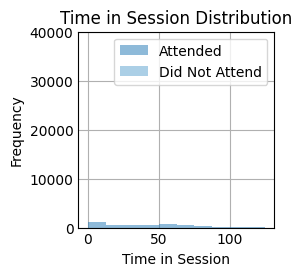

In [ ]:
# @title Time in Session Distribution

import matplotlib.pyplot as plt

plt.hist(df2[df2['attended'] == 'Yes']['time_in_session'], alpha=0.5, label='Attended')
plt.hist(df2[df2['attended'] == 'No']['time_in_session'], alpha=0.5, label='Did Not Attend')

plt.xlabel('Time in Session')
plt.ylabel('Frequency')
plt.title('Time in Session Distribution')
_ = plt.legend()

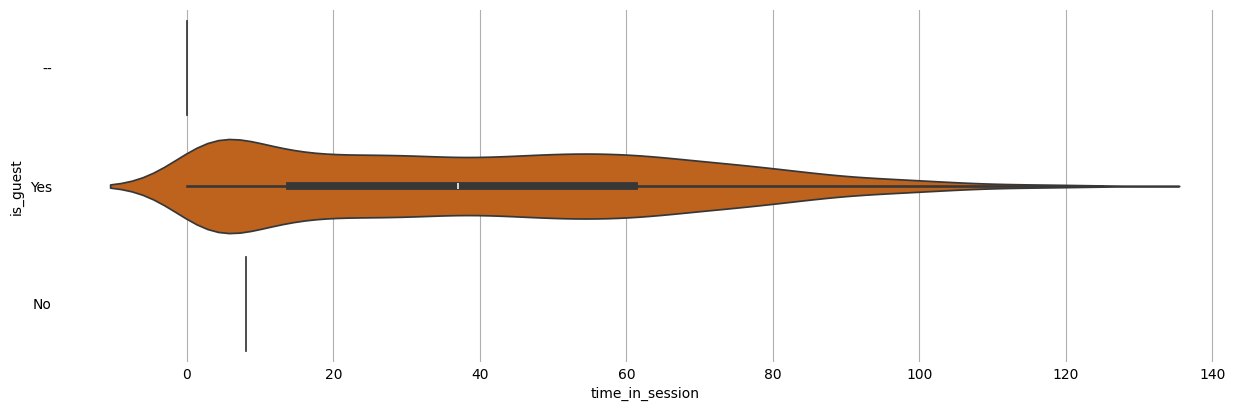

In [ ]:
# @title is_guest vs time_in_session

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df2['is_guest'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df2, x='time_in_session', y='is_guest', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Figure size 1200x800 with 0 Axes>

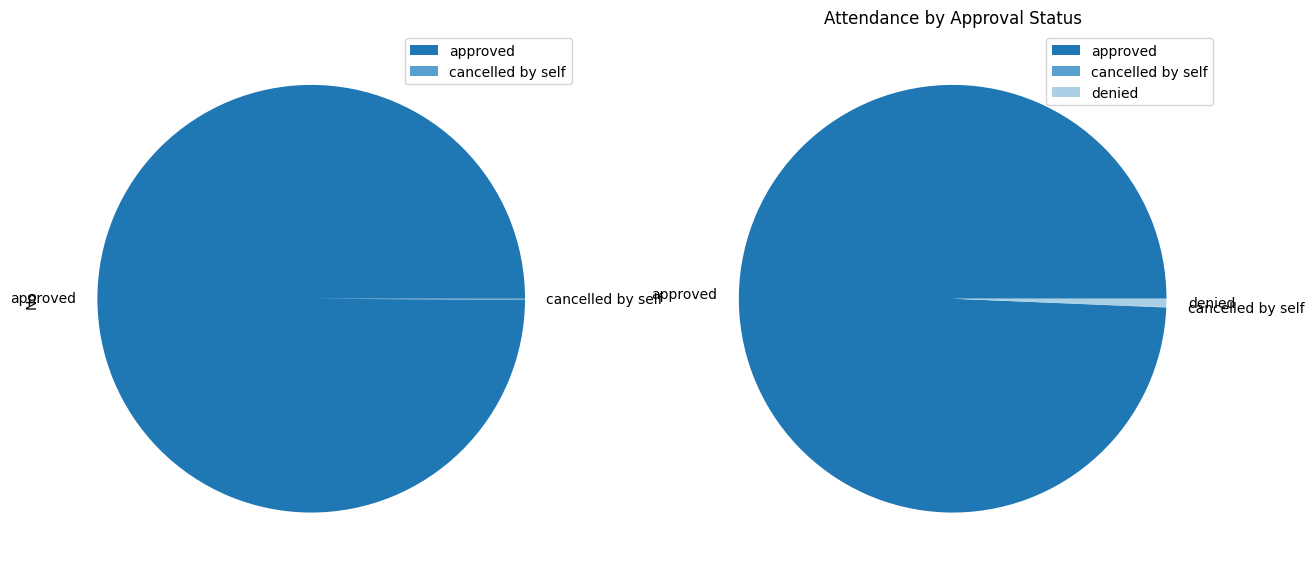

In [ ]:
# @title Attendance by Approval Status

# import matplotlib.pyplot as plt

# df2.groupby('approval_status')['attended'].value_counts().unstack().plot(kind='pie', subplots=True)
# plt.ylabel('')
# _ = plt.title('Attendance by Approval Status')
import matplotlib.pyplot as plt

# Change the size of the plot
plt.figure(figsize=(12, 8))  # Change the values to set the desired size

# Group by 'approval_status' and plot the pie charts
df2.groupby('approval_status')['attended'].value_counts().unstack().plot(kind='pie', subplots=True, figsize=(12, 8))

plt.ylabel('')
_ = plt.title('Attendance by Approval Status')

plt.show()


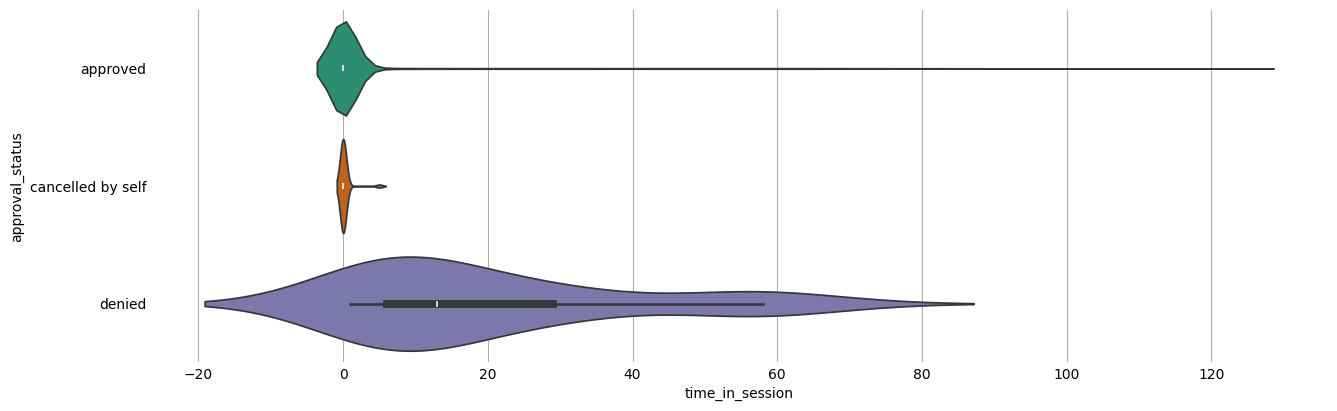

In [ ]:
# @title approval_status vs time_in_session

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df2['approval_status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df2, x='time_in_session', y='approval_status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

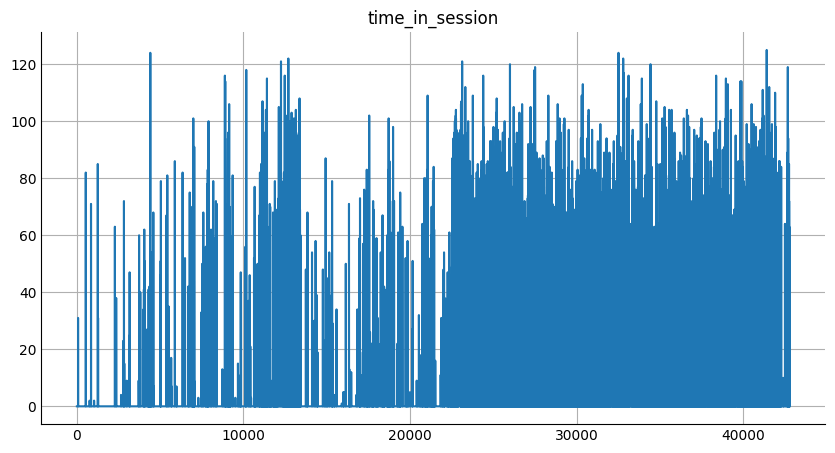

In [ ]:
# @title time_in_session

from matplotlib import pyplot as plt
df2['time_in_session'].plot(kind='line', figsize=(8, 4), title='time_in_session')
plt.gca().spines[['top', 'right']].set_visible(False)

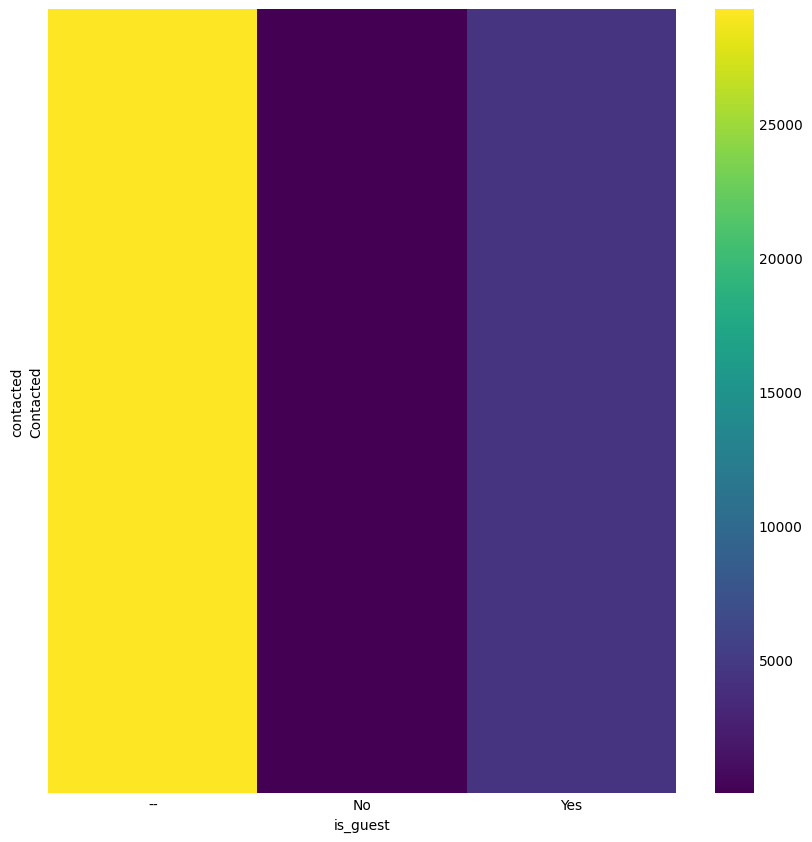

In [ ]:
# @title is_guest vs contacted

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['contacted'].value_counts()
    for x_label, grp in df2.groupby('is_guest')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('is_guest')
_ = plt.ylabel('contacted')

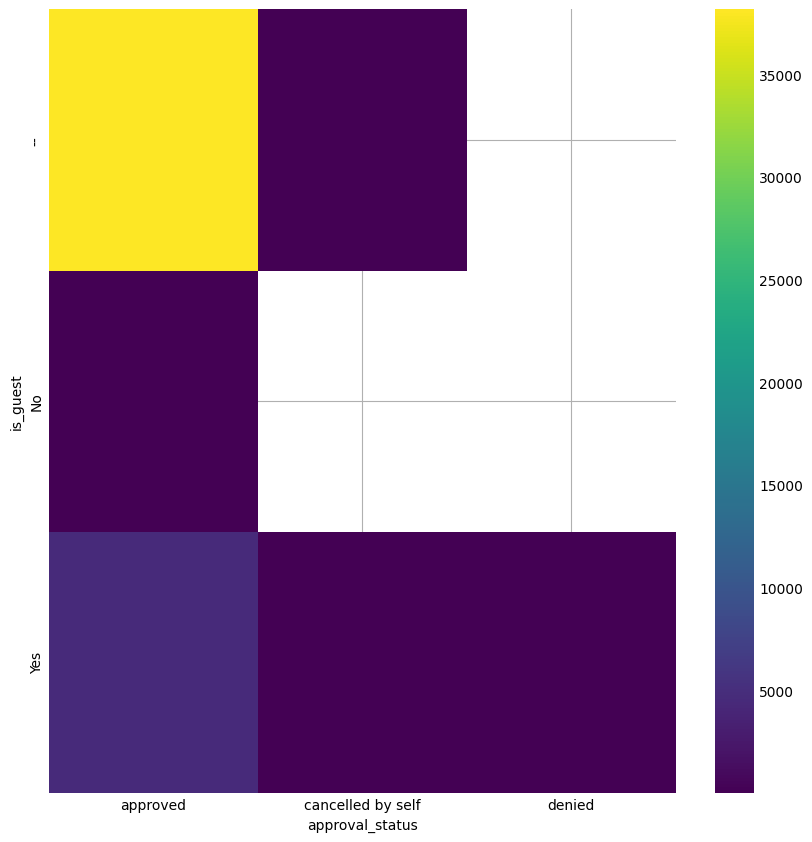

In [ ]:
# @title approval_status vs is_guest

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['is_guest'].value_counts()
    for x_label, grp in df2.groupby('approval_status')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('approval_status')
_ = plt.ylabel('is_guest')

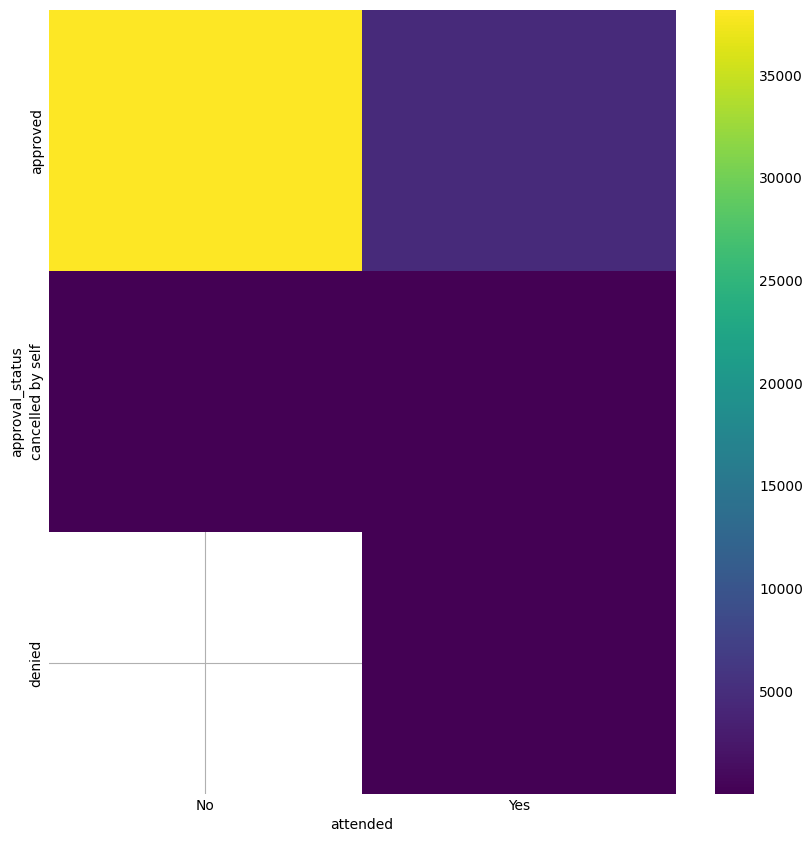

In [ ]:
# @title attended vs approval_status

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['approval_status'].value_counts()
    for x_label, grp in df2.groupby('attended')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('attended')
_ = plt.ylabel('approval_status')

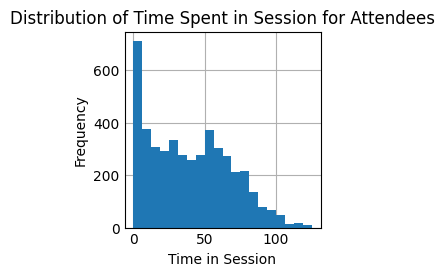

In [ ]:
# @title Time in Session Distribution

import matplotlib.pyplot as plt

df2_attended = df2[df2['attended'] == 'Yes']

plt.hist(df2_attended['time_in_session'], bins=20)
plt.xlabel('Time in Session')
plt.ylabel('Frequency')
_ = plt.title('Distribution of Time Spent in Session for Attendees')

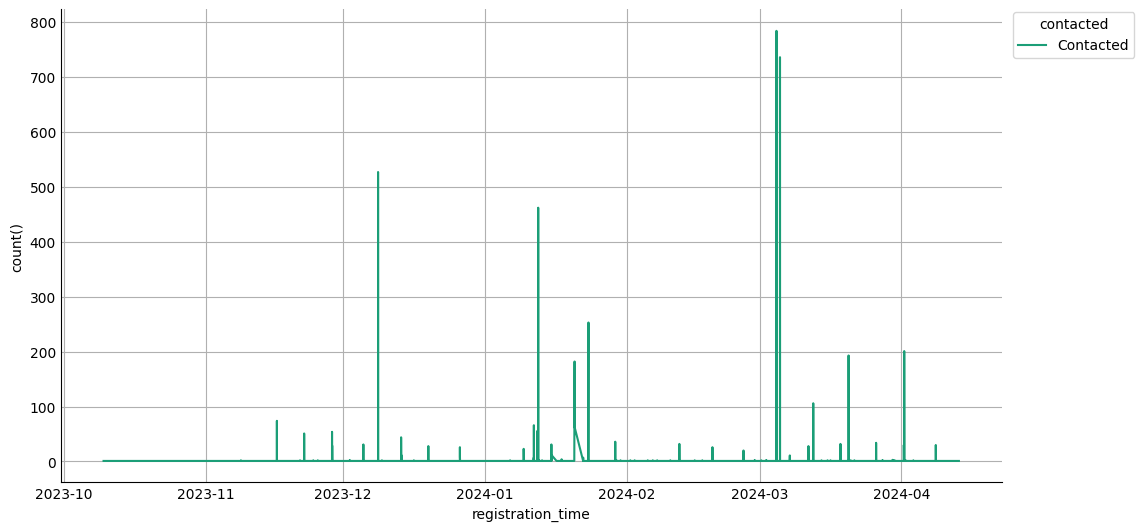

In [ ]:
# @title registration_time vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['registration_time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'registration_time'}, axis=1)
              .sort_values('registration_time', ascending=True))
  xs = counted['registration_time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('registration_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('contacted')):
  _plot_series(series, series_name, i)
  fig.legend(title='contacted', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('registration_time')
_ = plt.ylabel('count()')

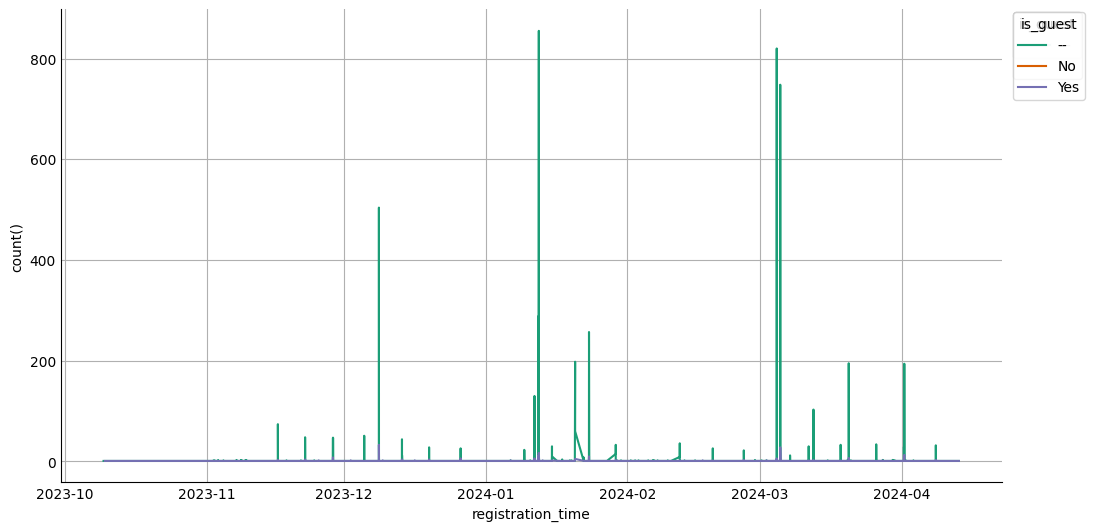

In [ ]:
# @title registration_time vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['registration_time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'registration_time'}, axis=1)
              .sort_values('registration_time', ascending=True))
  xs = counted['registration_time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('registration_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('is_guest')):
  _plot_series(series, series_name, i)
  fig.legend(title='is_guest', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('registration_time')
_ = plt.ylabel('count()')

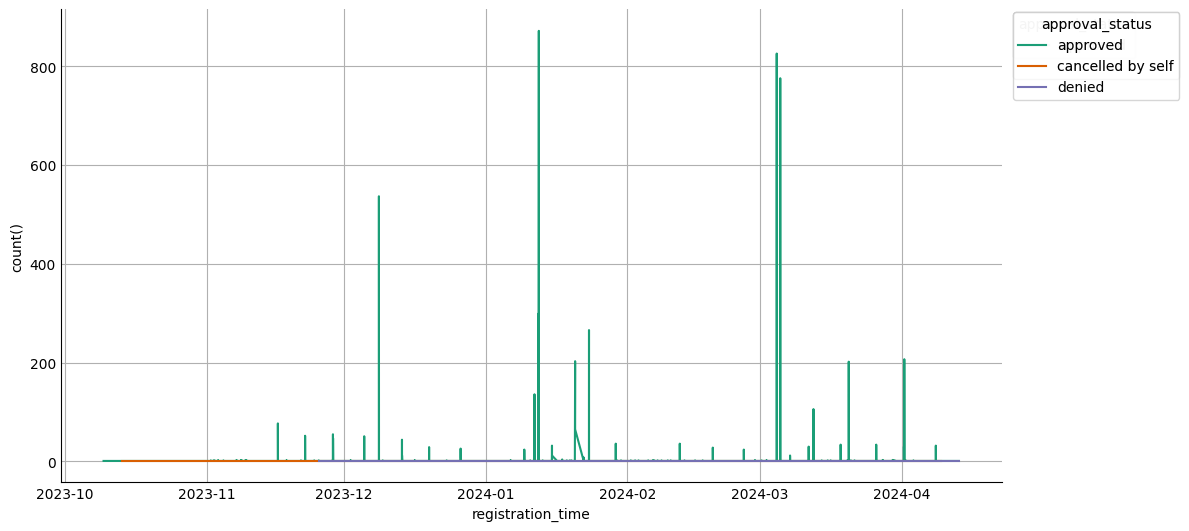

In [ ]:
# @title registration_time vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['registration_time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'registration_time'}, axis=1)
              .sort_values('registration_time', ascending=True))
  xs = counted['registration_time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('registration_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('approval_status')):
  _plot_series(series, series_name, i)
  fig.legend(title='approval_status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('registration_time')
_ = plt.ylabel('count()')

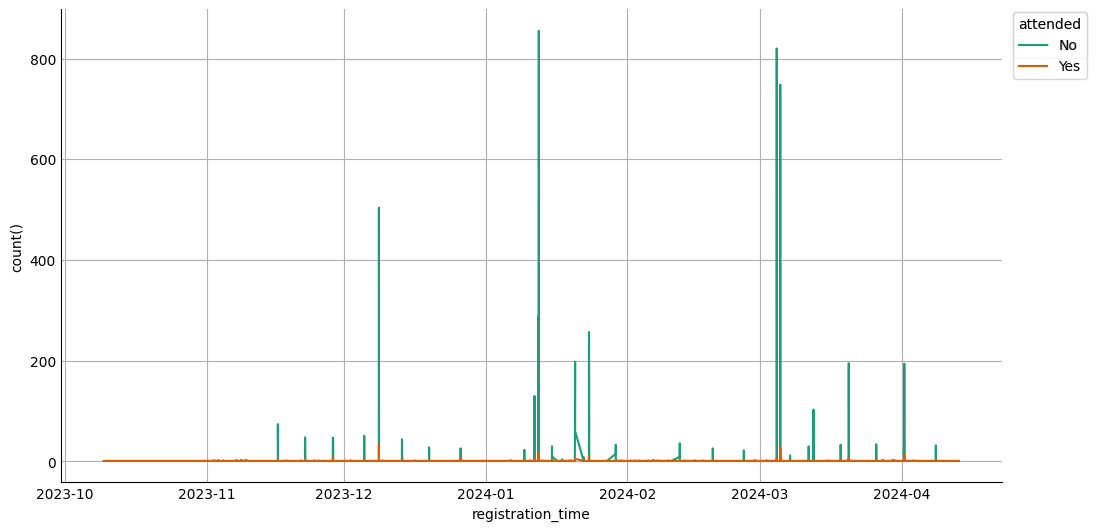

In [ ]:
# @title registration_time vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['registration_time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'registration_time'}, axis=1)
              .sort_values('registration_time', ascending=True))
  xs = counted['registration_time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('registration_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('attended')):
  _plot_series(series, series_name, i)
  fig.legend(title='attended', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('registration_time')
_ = plt.ylabel('count()')

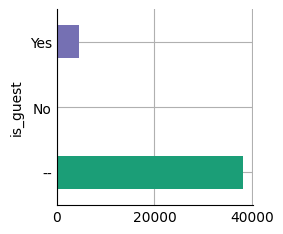

In [ ]:
# @title is_guest

from matplotlib import pyplot as plt
import seaborn as sns
df2.groupby('is_guest').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

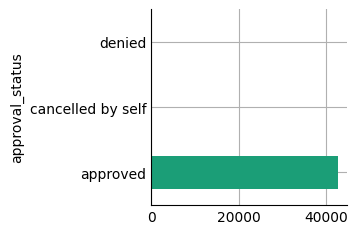

In [ ]:
# @title approval_status

from matplotlib import pyplot as plt
import seaborn as sns
df2.groupby('approval_status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

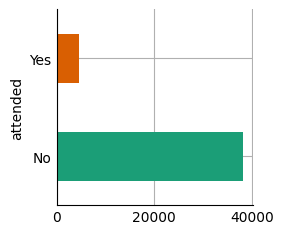

In [ ]:
# @title attended

from matplotlib import pyplot as plt
import seaborn as sns
df2.groupby('attended').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

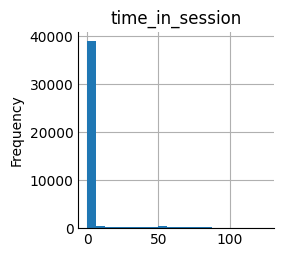

In [ ]:
# @title time_in_session

from matplotlib import pyplot as plt
df2['time_in_session'].plot(kind='hist', bins=20, title='time_in_session')
plt.gca().spines[['top', 'right',]].set_visible(False)

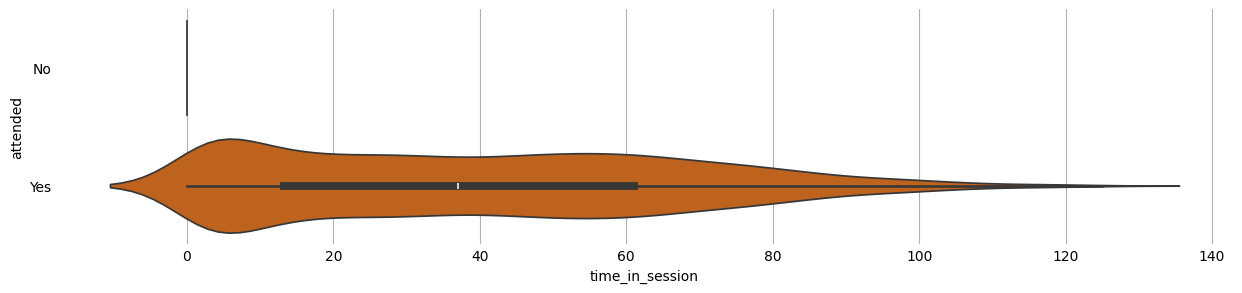

In [ ]:
# @title attended vs time_in_session

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df2['attended'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df2, x='time_in_session', y='attended', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
data4 = pd.read_excel('/content/Tokens Paid.xlsx')
df4 = pd.DataFrame(data4)
df4

Name             Lead ID created_date  paid_date    cohort  \
0     Saurabh                 NaN   2024-03-01 2024-03-07  Cohort 2   
1     Sudheer                 NaN   2023-08-25 2023-08-30  Cohort 1   
2      Swathi                 NaN   2023-09-19 2023-10-06  Cohort 1   
3       Kabir                 NaN   2024-03-21 2024-03-23  Cohort 2   
4      Vikash                 NaN   2023-08-05 2023-08-14  Cohort 1   
..        ...                 ...          ...        ...       ...   
262     Ashok  l:1441157749822520   2024-04-10 2024-04-15  Cohort 2   
263   Plabini   l:733737222271914   2024-04-09 2024-04-14  Cohort 2   
264    Pranav   l:861701659054416   2024-03-30 2024-04-14  Cohort 2   
265     Gokul  l:1547362259166875   2024-04-04 2024-04-14  Cohort 2   
266  Shrishti  l:1347108042669193   2024-04-08 2024-04-15  Cohort 2   

                 source               agent        counsellor  \
0                   NaN         Sonu Mishra  Rishabh Tripathi   
1              LinkedIn     Shaqlain Sheikh  Shailendra singh   
2              LinkedIn               Rohit             Aarti   
3    Inbound Phone Call   Siddharth Goswami     Aviral Sharma   
4              LinkedIn     Shaqlain Sheikh            zareen   
..                  ...                 ...               ...   
262            Facebook  Bompada Sai Sudeep   Diptikanta Jena   
263        Zoom Webinar      Ratnesh Mishra  Rishabh Tripathi   
264        Zoom Webinar      Ratnesh Mishra          Shashwat   
265        Zoom Webinar        Simran Singh  Rishabh Tripathi   
266            Facebook        Chitwan Soni  Rishabh Tripathi   

                              prospect_id  upload_timestamp        status  
0                                     NaN               NaN  ACTIVE TOKEN  
1    d7d7ba30-8207-4a00-a2f0-72c9718a9ad7               NaN           NaN  
2    9f8bb6d3-d30e-4f73-baa8-8e1ae4dd3517               NaN           NaN  
3    0acf038e-e696-11ee-807d-02e22ea38447               NaN  ACTIVE TOKEN  
4    aa13b8b9-cff5-41fe-a1f5-353e4c90ab04               NaN           NaN  
..                                    ...               ...           ...  
262  6f4c7f29-9243-4a06-87af-b8f87be0b04f               NaN  ACTIVE TOKEN  
263  4199597c-341d-4cf4-8823-2fe391dcbfc6               NaN  ACTIVE TOKEN  
264  0181dce5-7a90-4d3f-b832-aee660d2aeb5               NaN  ACTIVE TOKEN  
265  63875ab3-7318-4fb2-a87a-52ab2594bfed               NaN  ACTIVE TOKEN  
266  661d27cb-5c53-499a-b852-5e8ac4cdf1de               NaN  ACTIVE TOKEN  

[267 rows x 11 columns]

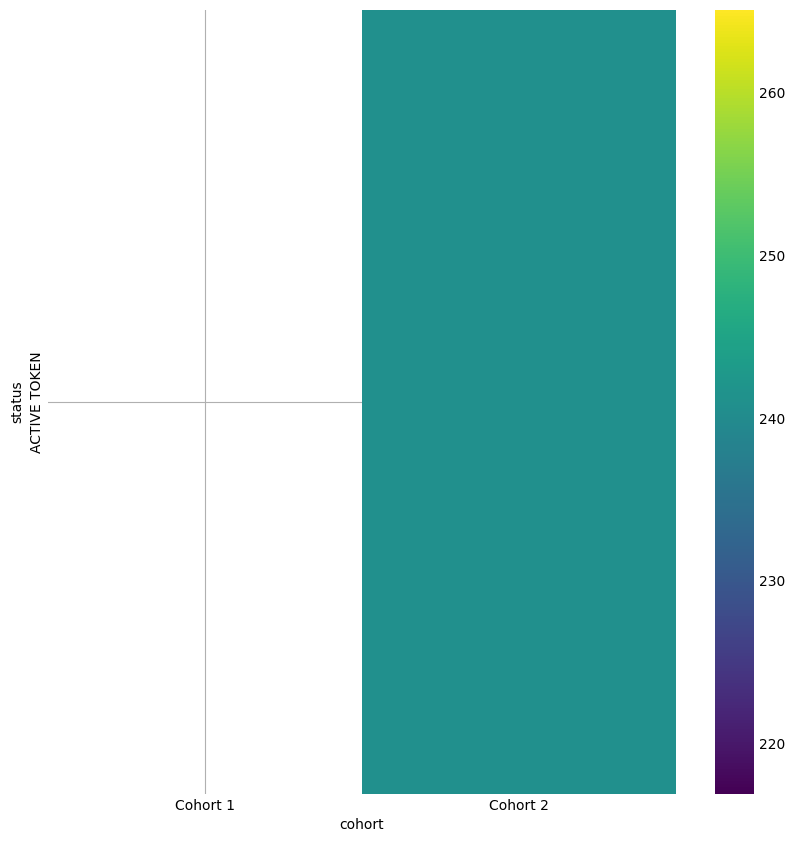

In [ ]:
# @title cohort vs status

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['status'].value_counts()
    for x_label, grp in df3.groupby('cohort')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('cohort')
_ = plt.ylabel('status')

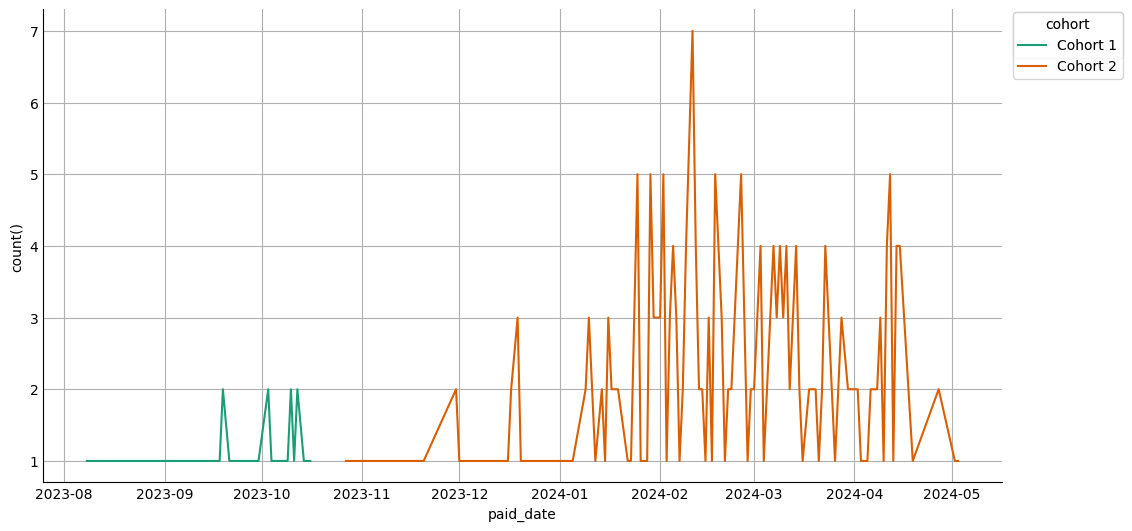

In [ ]:
# @title paid_date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['paid_date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'paid_date'}, axis=1)
              .sort_values('paid_date', ascending=True))
  xs = counted['paid_date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df3.sort_values('paid_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('cohort')):
  _plot_series(series, series_name, i)
  fig.legend(title='cohort', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('paid_date')
_ = plt.ylabel('count()')

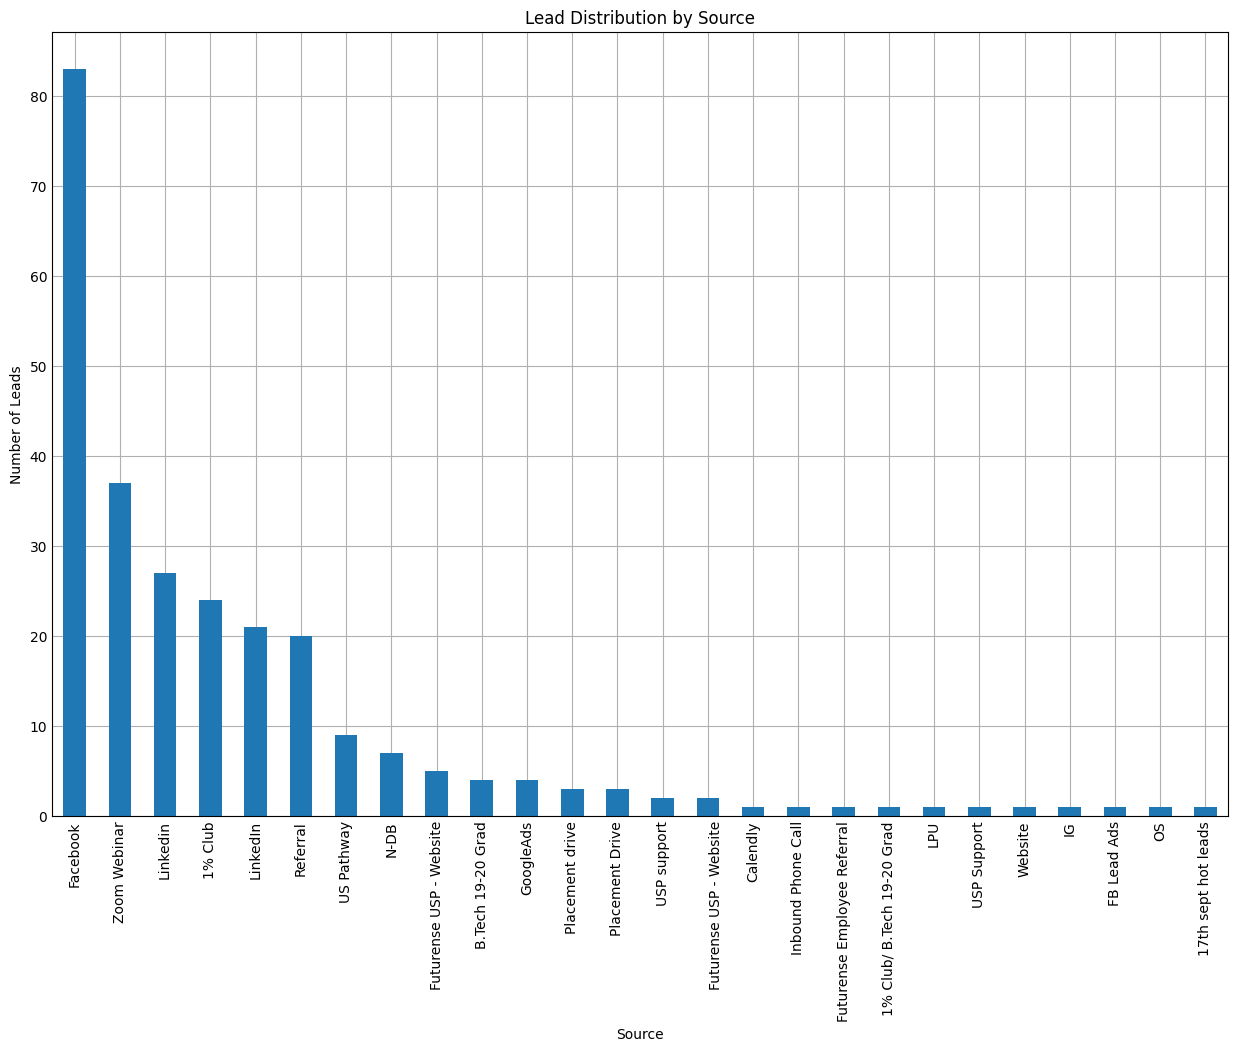

In [ ]:
# @title Lead Distribution by Source

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

df3['source'].value_counts().plot(kind='bar',figsize=(12, 8) )
plt.xlabel('Source')
plt.ylabel('Number of Leads')
_ = plt.title('Lead Distribution by Source')
plt.show()

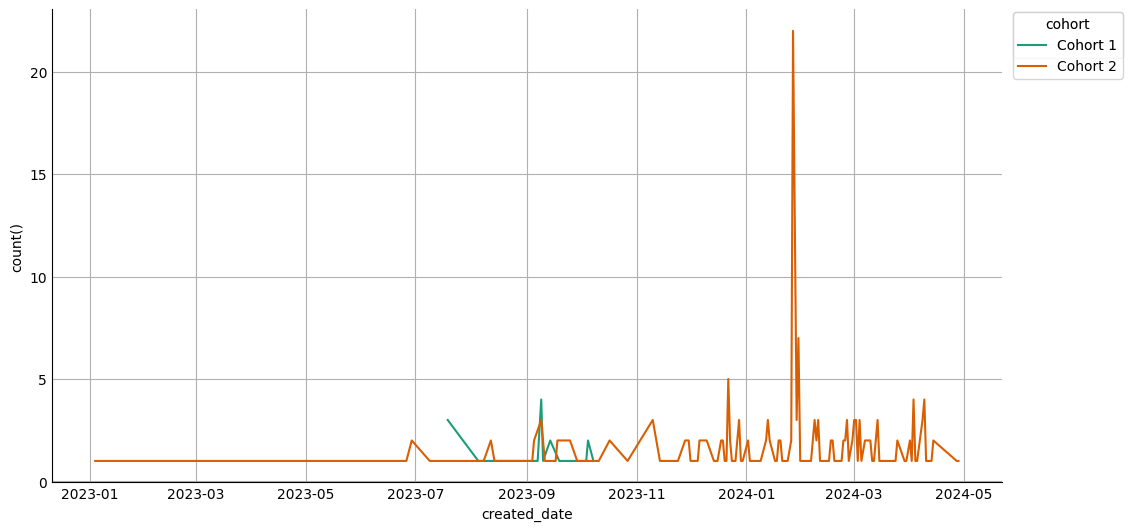

In [ ]:
# @title created_date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['created_date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'created_date'}, axis=1)
              .sort_values('created_date', ascending=True))
  xs = counted['created_date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df3.sort_values('created_date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('cohort')):
  _plot_series(series, series_name, i)
  fig.legend(title='cohort', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('created_date')
_ = plt.ylabel('count()')

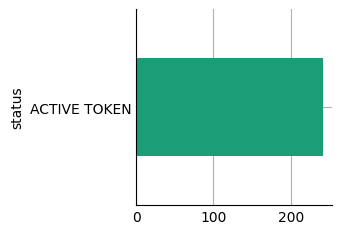

In [ ]:
# @title status

from matplotlib import pyplot as plt
import seaborn as sns
df3.groupby('status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

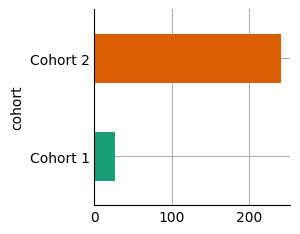

In [ ]:
# @title cohort

from matplotlib import pyplot as plt
import seaborn as sns
df3.groupby('cohort').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data5 = pd.read_excel('/content/campaign_performance.xlsx')
df5 = pd.DataFrame(data5)
df5

dates                        campaign_name campaign_start_date  \
0     2024-04-29           USP_Search_APTNTSKA_250124                 NaT   
1     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424                 NaT   
2     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424                 NaT   
3     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424                 NaT   
4     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424                 NaT   
...          ...                                  ...                 ...   
28529 2024-03-12        USP_MS + Coop Campaign_240224                 NaT   
28530 2024-03-12        USP_MS + Coop Campaign_240224                 NaT   
28531 2024-03-12      USP Study Abroad_Generic_240224                 NaT   
28532 2024-03-12      USP Study Abroad_Generic_240224                 NaT   
28533 2024-03-12      USP Study Abroad_Generic_240224                 NaT   

                           creative_name  total_spent  impressions  clicks  \
0                                     --      6766.15         1250     220   
1       #7 ( Graphic ) - Get A Free Pass       946.38         3154       9   
2               USP_S3_never-been-easier       170.40         2695       8   
3                     USP_S4_Do-you-have        55.65          577       2   
4                    USP_S1_We-guarantee       296.94         1466      10   
...                                  ...          ...          ...     ...   
28529                    USP_RG_VideoAd5        67.18          268       1   
28530                    USP_RG_VideoAd5        50.65           75       1   
28531  USP_Webinar_Saturdayfuture - Copy        11.34           28       0   
28532  USP_Webinar_Saturdayfuture - Copy       136.97          134       0   
28533         USP_Webinar_Saturdayfuture       242.59           24       0   

       click_through_rate  leads  platform  \
0                0.176000   25.0    Google   
1                0.285352    1.0  Facebook   
2                0.296846    0.0  Facebook   
3                0.346620    0.0  Facebook   
4                0.682128    1.0  Facebook   
...                   ...    ...       ...   
28529            0.373134    0.0  Facebook   
28530            1.333333    0.0  Facebook   
28531            0.000000    0.0  Facebook   
28532            0.000000    0.0  Facebook   
28533            0.000000    0.0  Facebook   

                                  adset_name  
0                                   GMAT/GRE  
1                         USP-2_KA_TN_050424  
2                         USP-2_KA_TN_050424  
3                         USP-2_KA_TN_050424  
4                         USP-2_AP_TS_050424  
...                                      ...  
28529        MS + Coop KA&TN Ad set - 240224  
28530    MS + Coop All India Ad set - 240224  
28531      AP&TS Generic Leads Ad Set_240224  
28532      KA&TN Generic Leads Ad Set_240224  
28533  All India Generic Leads Ad Set_240224  

[28534 rows x 11 columns]

<Figure size 1200x800 with 0 Axes>

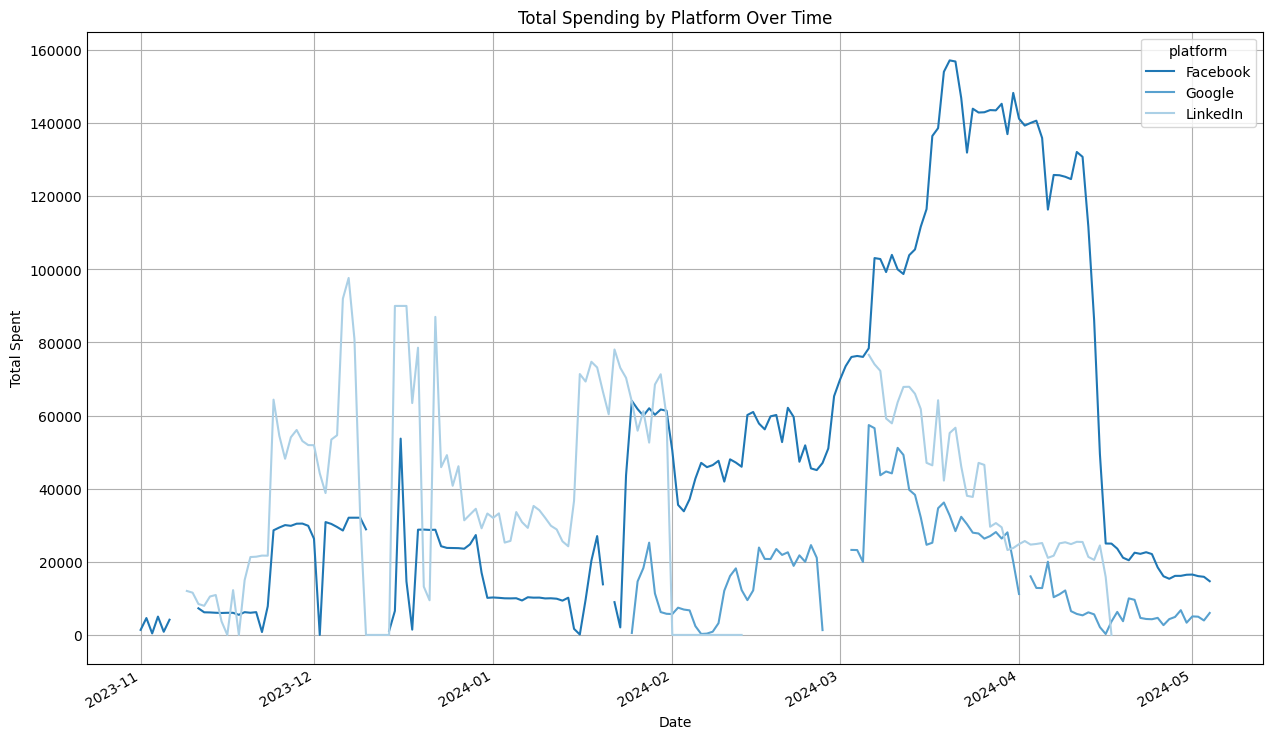

In [ ]:
# @title Total Spending by Platform Over Time

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
df5.groupby(['dates', 'platform'])['total_spent'].sum().unstack().plot(kind='line',figsize=(12, 8))
plt.xlabel('Date')
plt.ylabel('Total Spent')
_ = plt.title('Total Spending by Platform Over Time')

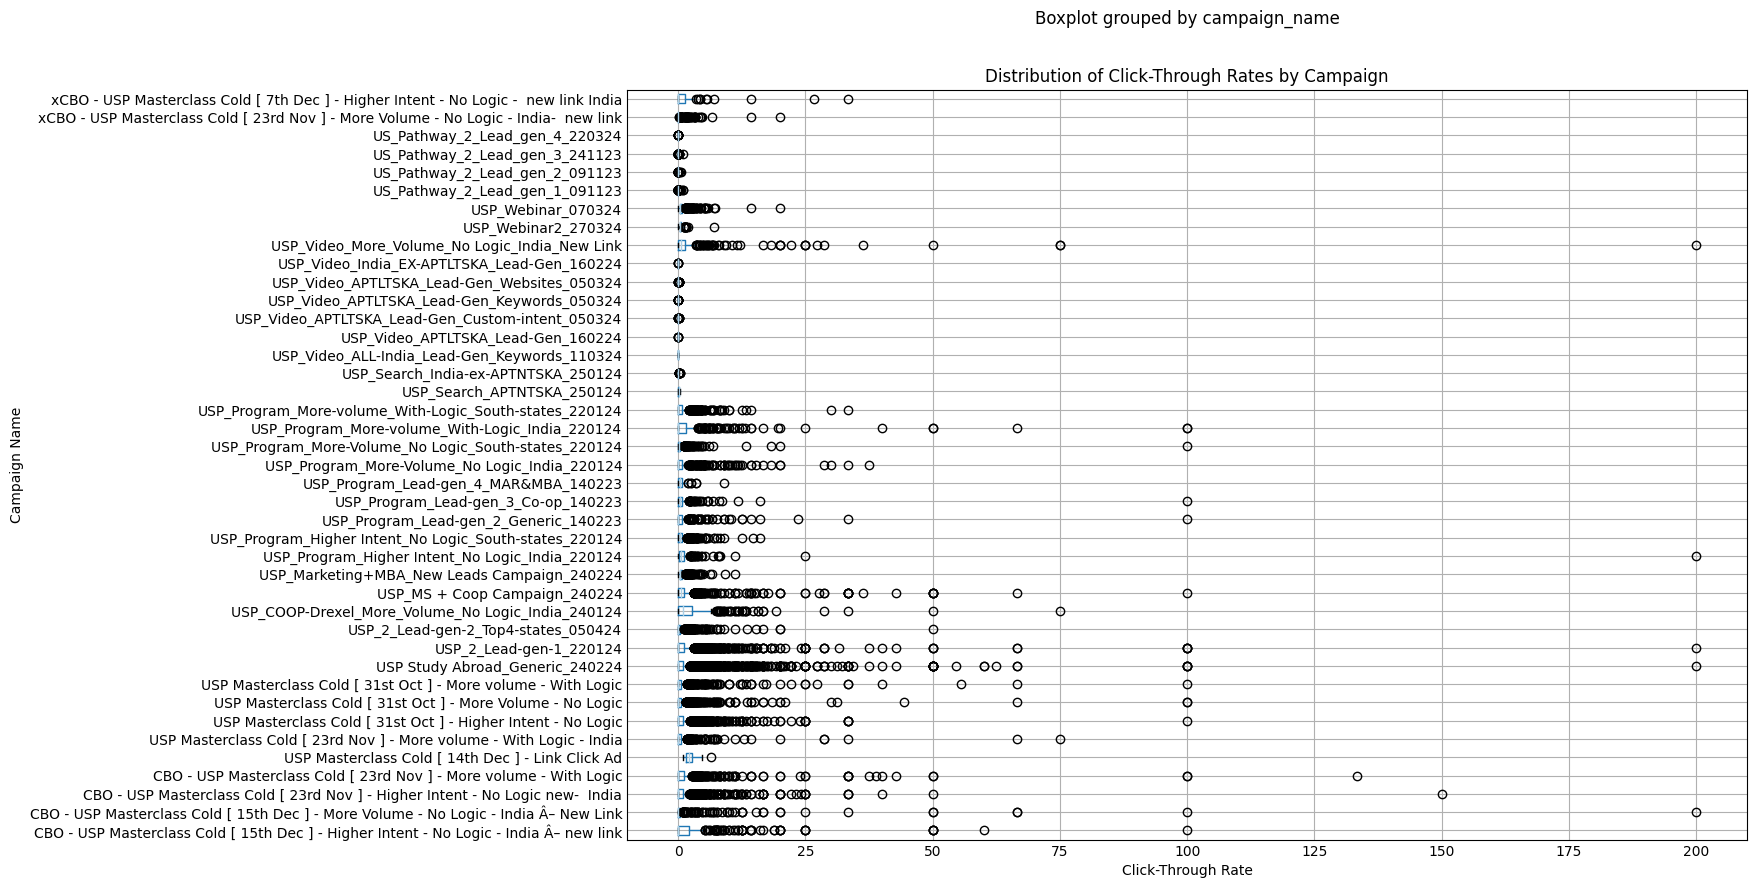

In [ ]:
# @title Distribution of Click-Through Rates by Campaign

import matplotlib.pyplot as plt

df4.boxplot(column='click_through_rate', by='campaign_name', vert=False, figsize=(14, 10))
plt.xlabel('Click-Through Rate')
plt.ylabel('Campaign Name')
_ = plt.title('Distribution of Click-Through Rates by Campaign')

In [ ]:

# check invalid valuse
for col in df5:
  print(f"{col} has {df5[col].nunique()} unique value")

dates has 184 unique value
campaign_name has 41 unique value
campaign_start_date has 3 unique value
creative_name has 146 unique value
total_spent has 17208 unique value
impressions has 6579 unique value
clicks has 497 unique value
click_through_rate has 7006 unique value
leads has 124 unique value
platform has 3 unique value
adset_name has 69 unique value


In [ ]:
# Group by 'campaign_name' and count unique 'creative_name'
campaign_creative_counts = df5.groupby('campaign_name')['creative_name'].nunique()

# Print the result
print(campaign_creative_counts)

campaign_name
CBO - USP Masterclass Cold [ 15th Dec ] - Higher Intent - No Logic - India Â– new link    17
CBO - USP Masterclass Cold [ 15th Dec ] - More Volume - No Logic - India Â– New Link      10
CBO - USP Masterclass Cold [ 23rd Nov ] - Higher Intent - No Logic new-  India            15
CBO - USP Masterclass Cold [ 23rd Nov ] - More volume - With Logic                        12
USP Masterclass Cold [ 14th Dec ] - Link Click Ad                                         10
USP Masterclass Cold [ 23rd Nov ] - More volume - With Logic - India                      10
USP Masterclass Cold [ 31st Oct ] - Higher Intent - No Logic                              10
USP Masterclass Cold [ 31st Oct ] - More Volume - No Logic                                11
USP Masterclass Cold [ 31st Oct ] - More volume - With Logic                              10
USP Study Abroad_Generic_240224                                                           34
USP_2_Lead-gen-1_220124                                 

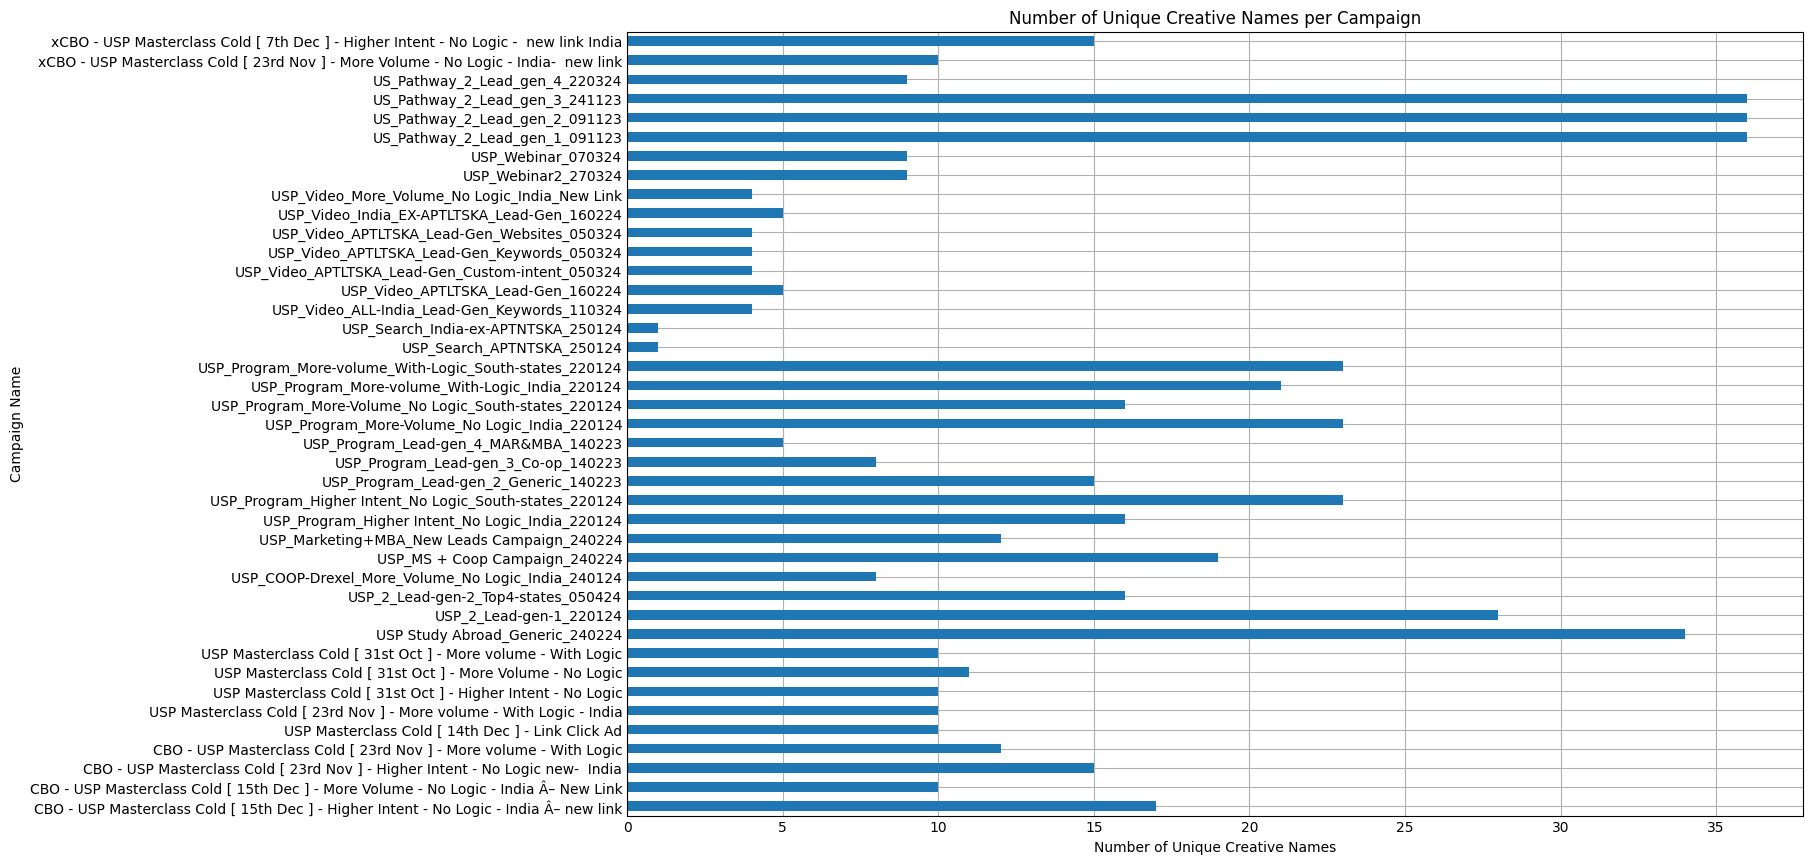

In [ ]:
import matplotlib.pyplot as plt

# Plot the result
campaign_creative_counts.plot(kind='barh', figsize=(12, 8))
plt.ylabel('Campaign Name')
plt.xlabel('Number of Unique Creative Names')
plt.title('Number of Unique Creative Names per Campaign')
plt.show()


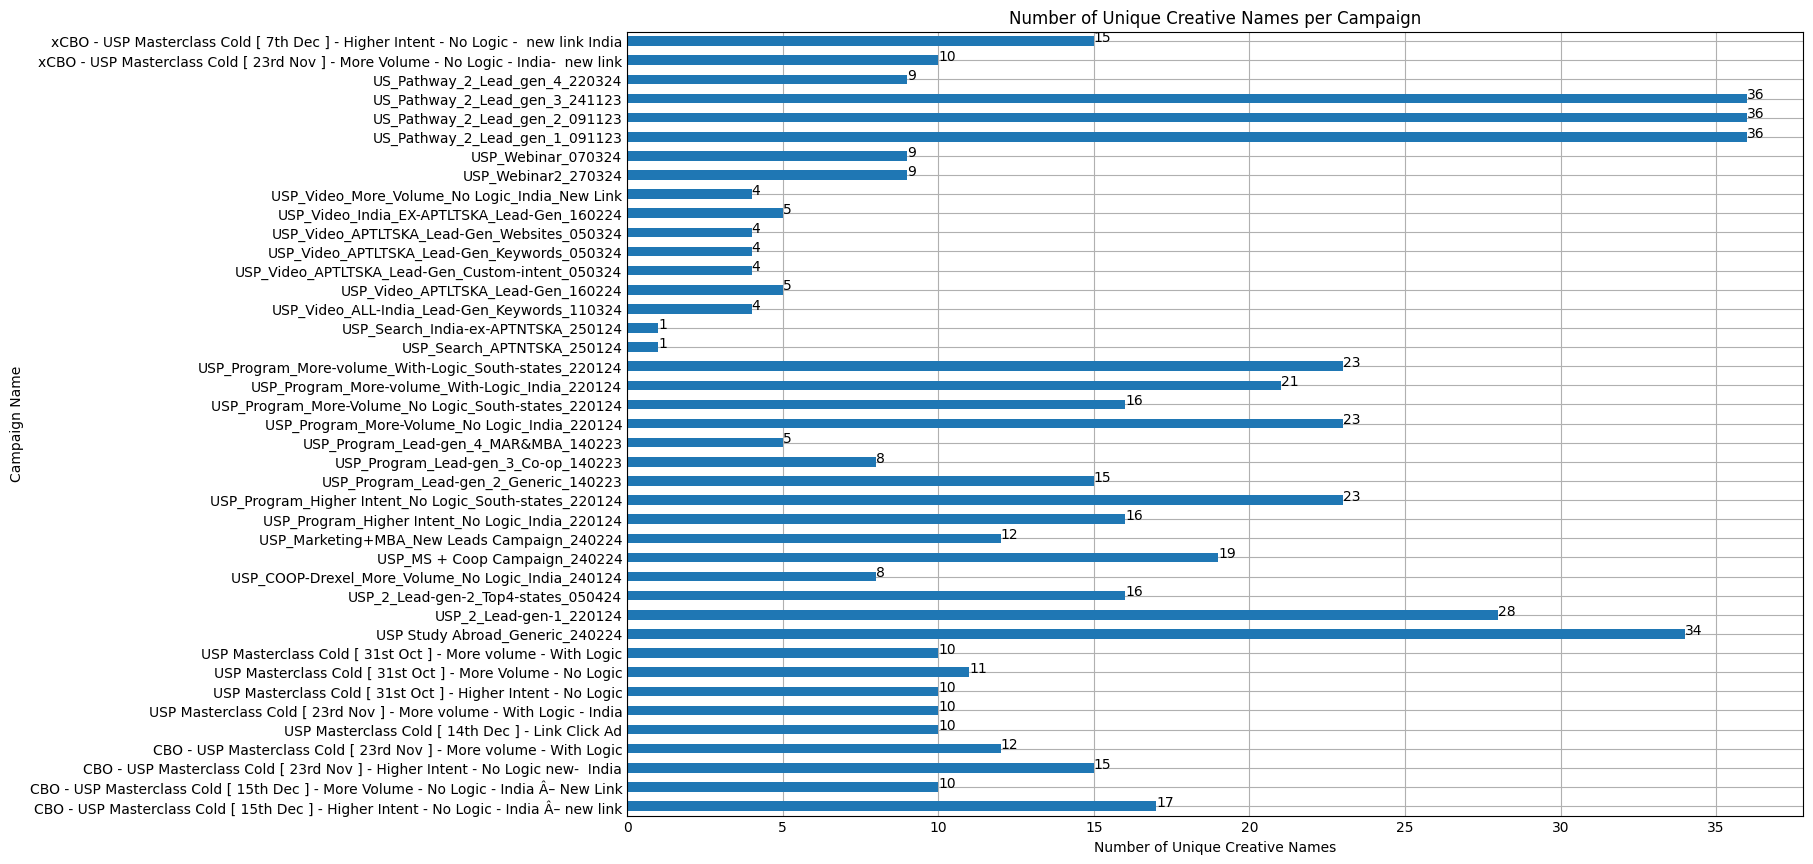

In [ ]:
# Group by 'campaign_name' and count unique 'creative_name'
campaign_creative_counts = df5.groupby('campaign_name')['creative_name'].nunique()

# Plot the result as a horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))
campaign_creative_counts.plot(kind='barh', ax=ax)
ax.set_xlabel('Number of Unique Creative Names')
ax.set_ylabel('Campaign Name')
ax.set_title('Number of Unique Creative Names per Campaign')

# Add annotations to the bars
for index, value in enumerate(campaign_creative_counts):
    ax.text(value, index, str(value))

plt.show()

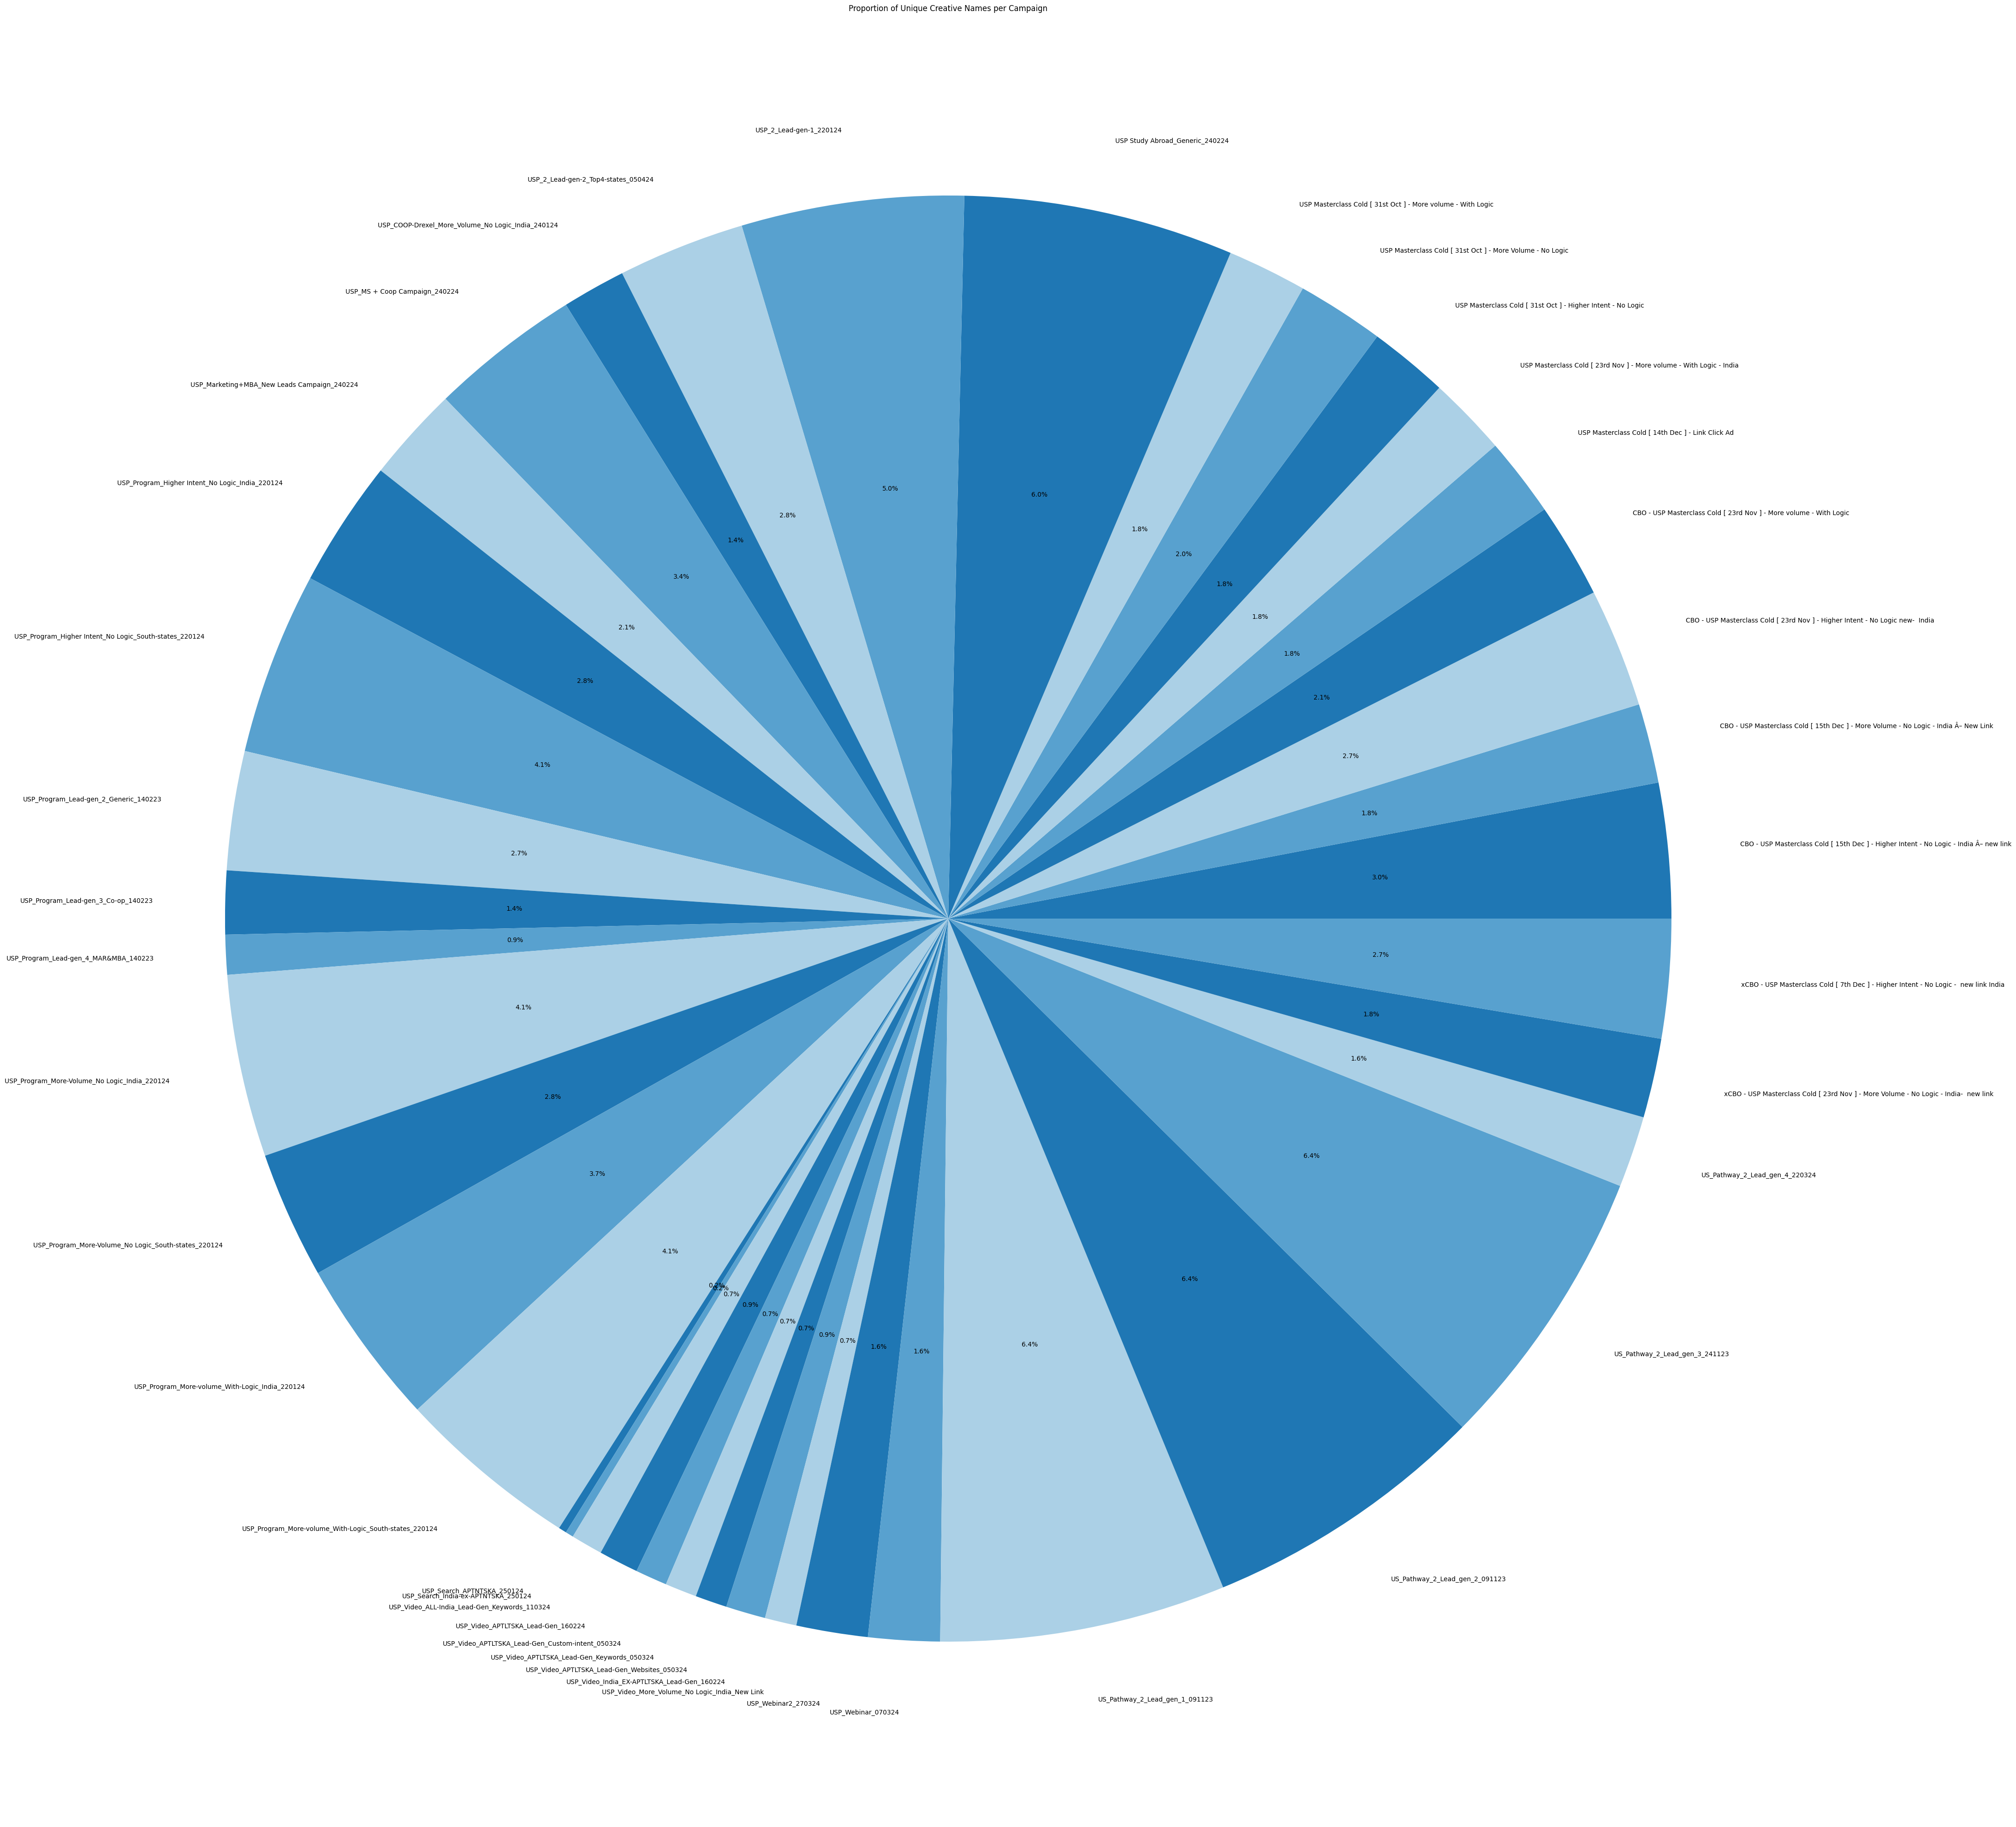

In [ ]:
# Group by 'campaign_name' and count unique 'creative_name'
campaign_creative_counts = df5.groupby('campaign_name')['creative_name'].nunique()

# Plot the result as a pie chart
plt.figure(figsize=(40, 40))
campaign_creative_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Unique Creative Names per Campaign')
plt.ylabel('')  # Hide the y-label
plt.show()

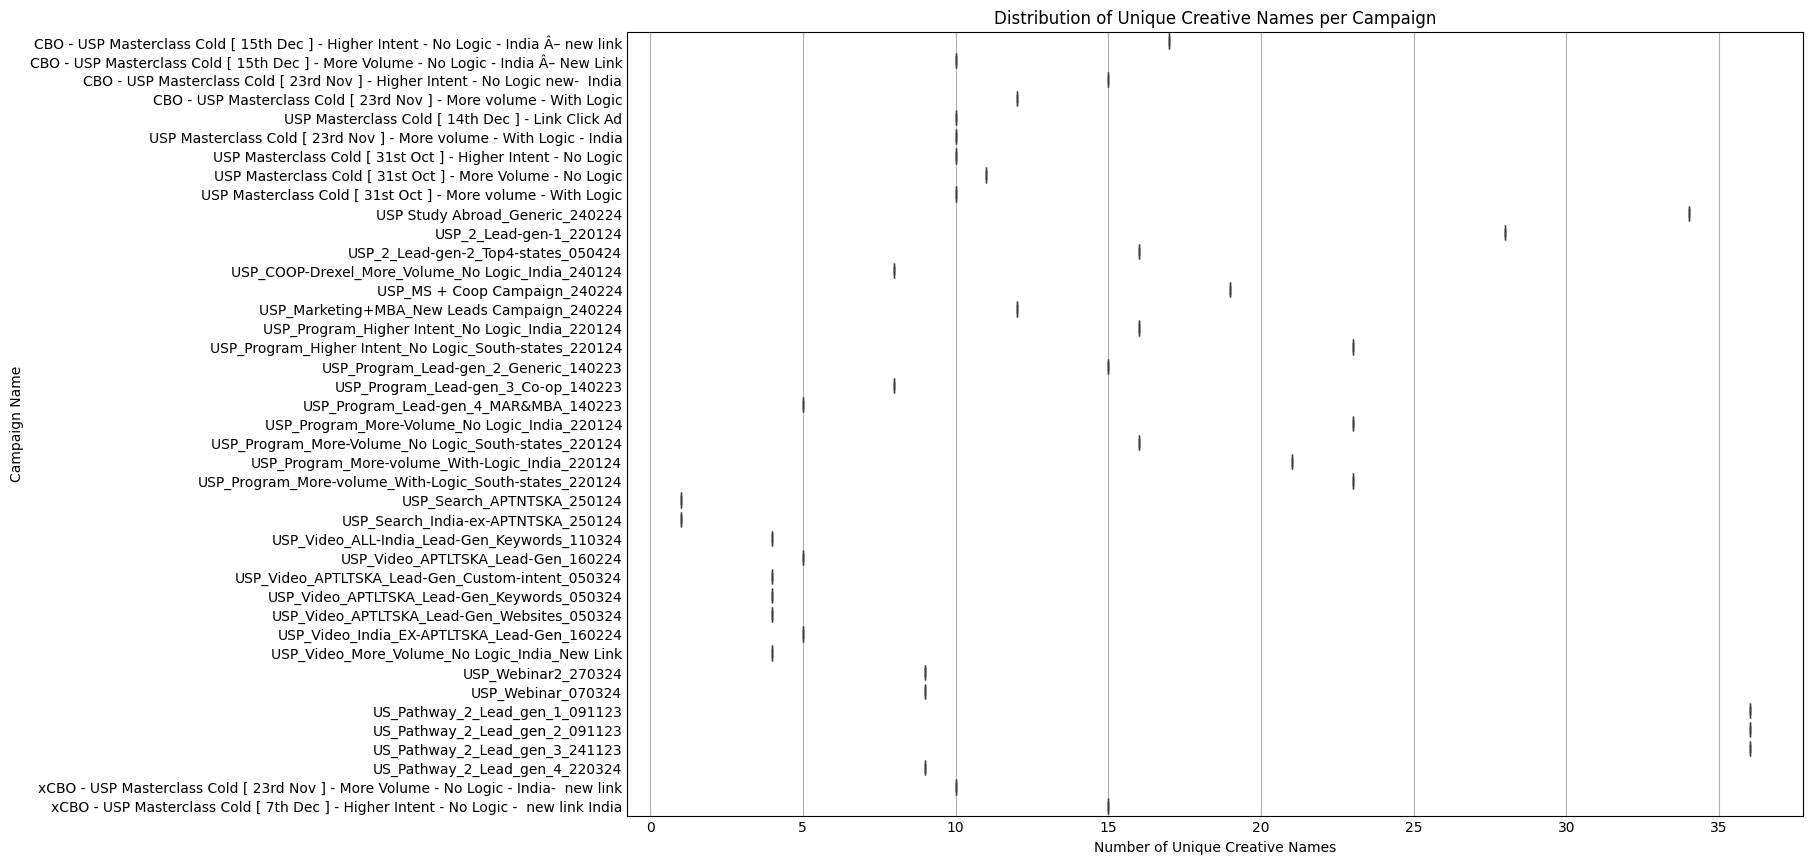

In [ ]:
# Assuming you have the data in a long format
campaign_creative_counts_df = df5.groupby('campaign_name')['creative_name'].nunique().reset_index()

# Plot the result as a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='creative_name', y='campaign_name', data=campaign_creative_counts_df)
plt.xlabel('Number of Unique Creative Names')
plt.ylabel('Campaign Name')
plt.title('Distribution of Unique Creative Names per Campaign')
plt.show()

In [ ]:
# Group by 'campaign_name' and count unique 'creative_name'
campaign_creative_counts = df5.groupby('campaign_name')['creative_name'].nunique().reset_index()

# Pivot the data to a wide format if necessary
heatmap_data = campaign_creative_counts.pivot('campaign_name', 'creative_name')

# Plot the result as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Creative Names')
plt.ylabel('Campaign Name')
plt.title('Heatmap of Unique Creative Names per Campaign')
plt.show()

TypeError: DataFrame.pivot() takes 1 positional argument but 3 were given

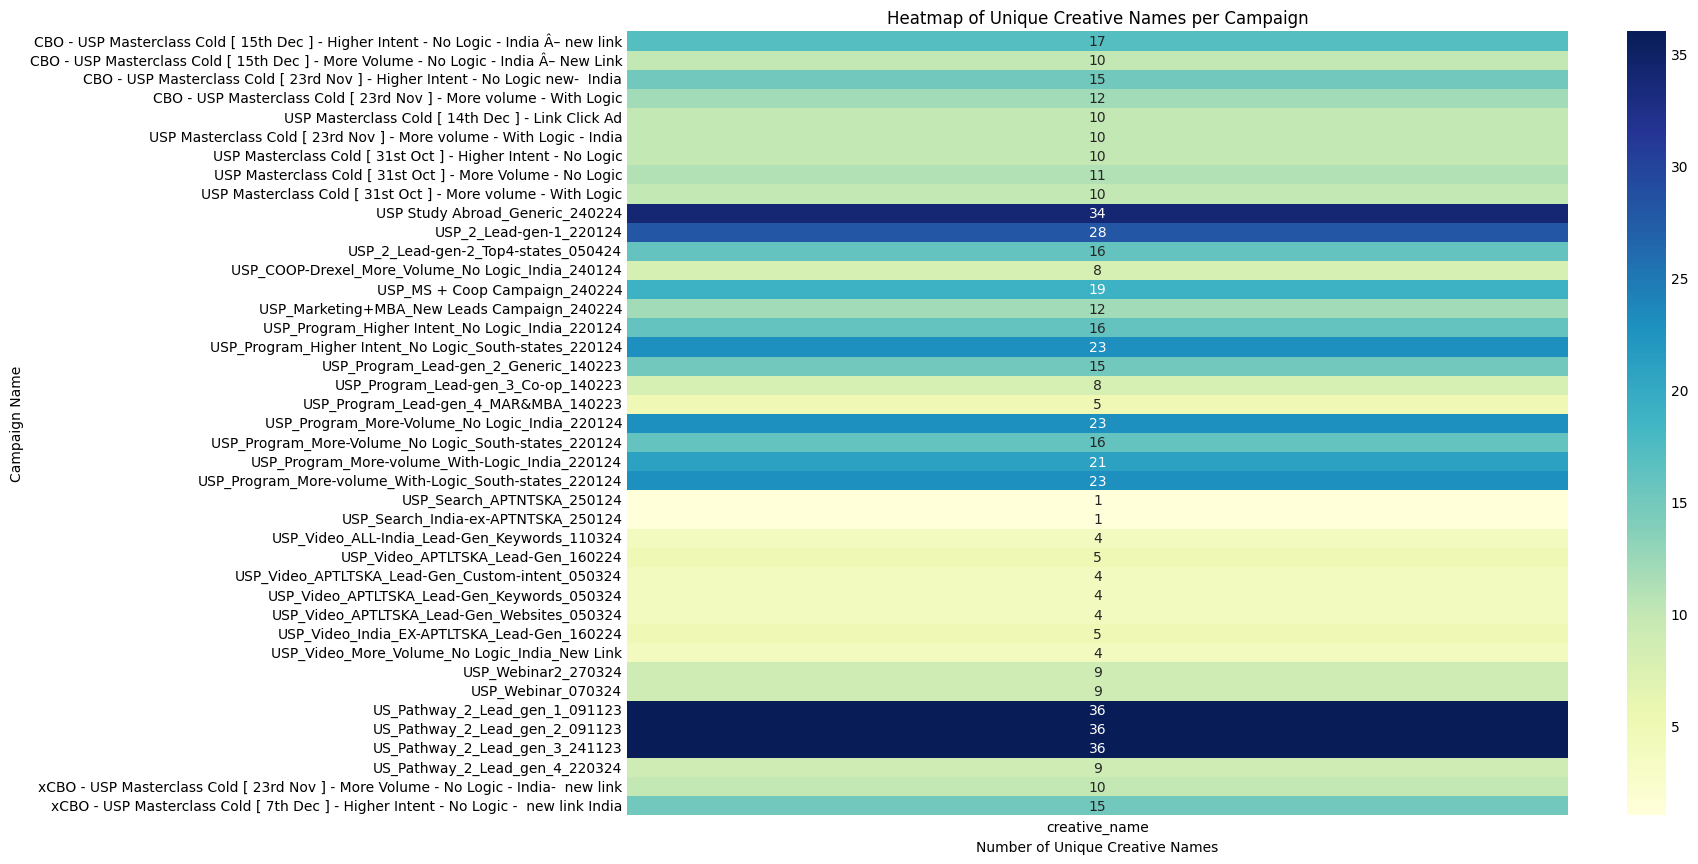

In [ ]:
# Group by 'campaign_name' and count unique 'creative_name'
campaign_creative_counts = df5.groupby('campaign_name')['creative_name'].nunique().reset_index()

# Pivot the data to a wide format if necessary
heatmap_data = campaign_creative_counts.pivot_table(index='campaign_name', values='creative_name', aggfunc='sum')

# Plot the result as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Number of Unique Creative Names')
plt.ylabel('Campaign Name')
plt.title('Heatmap of Unique Creative Names per Campaign')
plt.show()

In [ ]:
# Group by 'campaign_name' and sum 'total_spent'
campaign_total_spent = df5.groupby('campaign_name')['total_spent'].sum().reset_index()

# Print the result
print(campaign_total_spent)

                                        campaign_name  total_spent
0   CBO - USP Masterclass Cold [ 15th Dec ] - High...    186700.48
1   CBO - USP Masterclass Cold [ 15th Dec ] - More...    136833.11
2   CBO - USP Masterclass Cold [ 23rd Nov ] - High...    196255.37
3   CBO - USP Masterclass Cold [ 23rd Nov ] - More...    254353.16
4   USP Masterclass Cold [ 14th Dec ] - Link Click Ad     10452.55
5   USP Masterclass Cold [ 23rd Nov ] - More volum...    122867.55
6   USP Masterclass Cold [ 31st Oct ] - Higher Int...    205642.99
7   USP Masterclass Cold [ 31st Oct ] - More Volum...    109113.64
8   USP Masterclass Cold [ 31st Oct ] - More volum...     92486.22
9                     USP Study Abroad_Generic_240224   2126684.24
10                            USP_2_Lead-gen-1_220124    484768.66
11                USP_2_Lead-gen-2_Top4-states_050424    194398.53
12  USP_COOP-Drexel_More_Volume_No Logic_India_240124    126657.36
13                      USP_MS + Coop Campaign_240224   150104

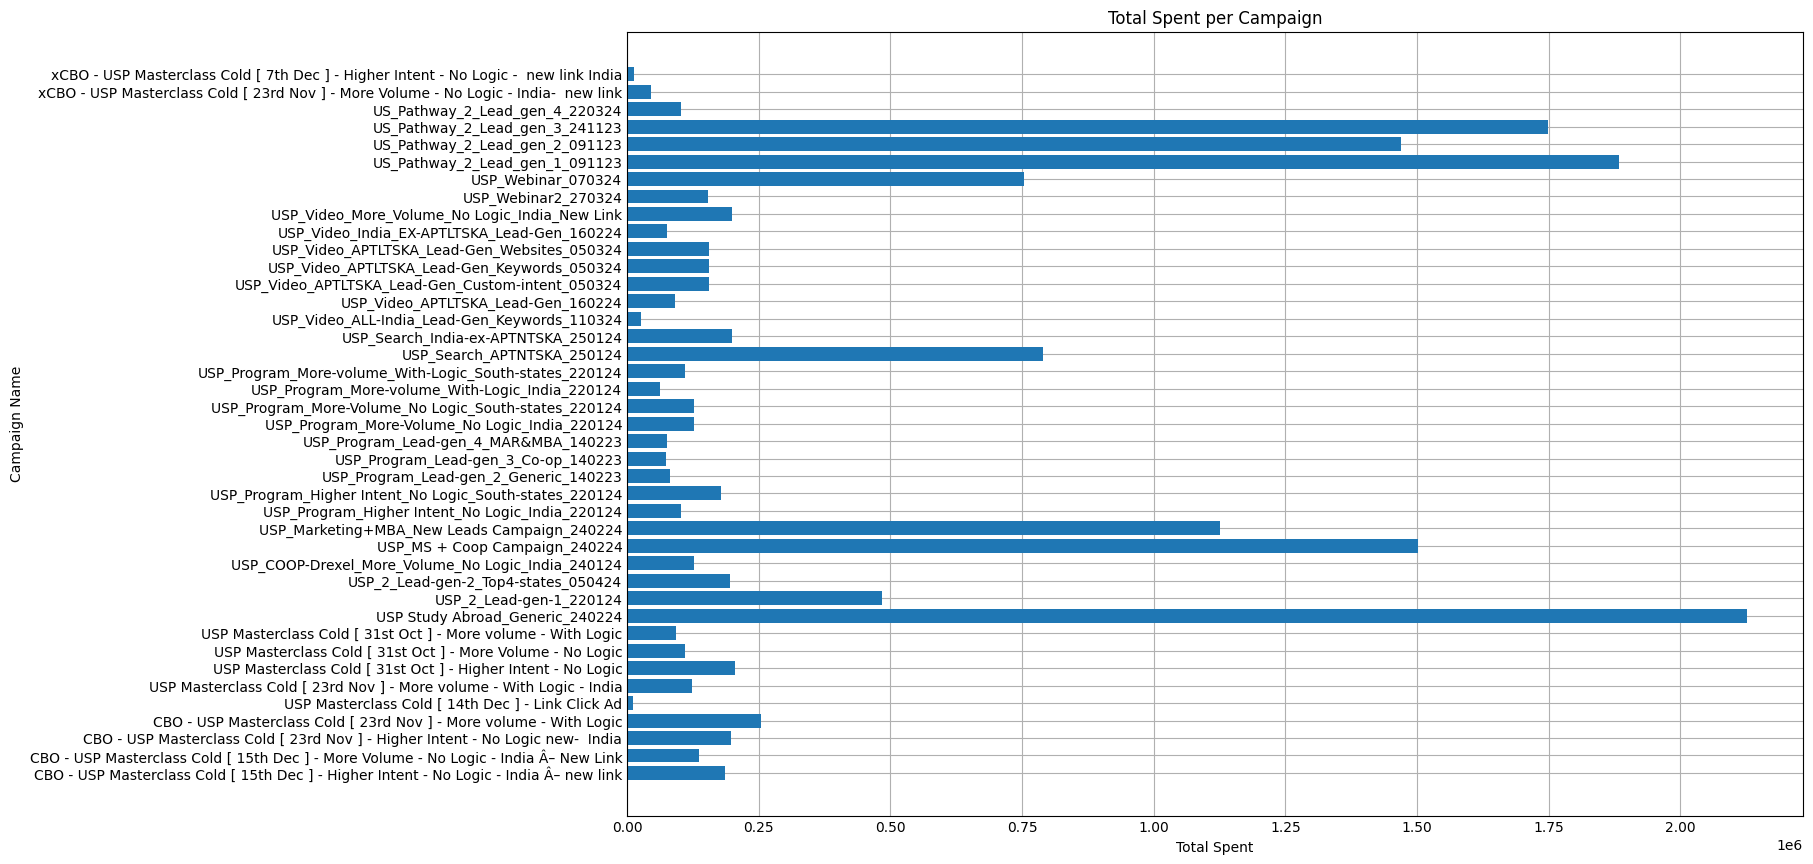

In [ ]:
import matplotlib.pyplot as plt

# Plot the result as a bar chart
plt.figure(figsize=(12, 8))
plt.barh(campaign_total_spent['campaign_name'], campaign_total_spent['total_spent'])
plt.xlabel('Total Spent')
plt.ylabel('Campaign Name')
plt.title('Total Spent per Campaign')
plt.show()

                                        campaign_name  total_spent
9                     USP Study Abroad_Generic_240224   2126684.24
35                     US_Pathway_2_Lead_gen_1_091123   1884063.88
37                     US_Pathway_2_Lead_gen_3_241123   1749087.89
13                      USP_MS + Coop Campaign_240224   1501040.54
36                     US_Pathway_2_Lead_gen_2_091123   1469168.59
14        USP_Marketing+MBA_New Leads Campaign_240224   1125425.52
24                         USP_Search_APTNTSKA_250124    789571.12
34                                 USP_Webinar_070324    752657.01
10                            USP_2_Lead-gen-1_220124    484768.66
3   CBO - USP Masterclass Cold [ 23rd Nov ] - More...    254353.16
6   USP Masterclass Cold [ 31st Oct ] - Higher Int...    205642.99
25                USP_Search_India-ex-APTNTSKA_250124    199442.83
32      USP_Video_More_Volume_No Logic_India_New Link    198416.23
2   CBO - USP Masterclass Cold [ 23rd Nov ] - High...    19625

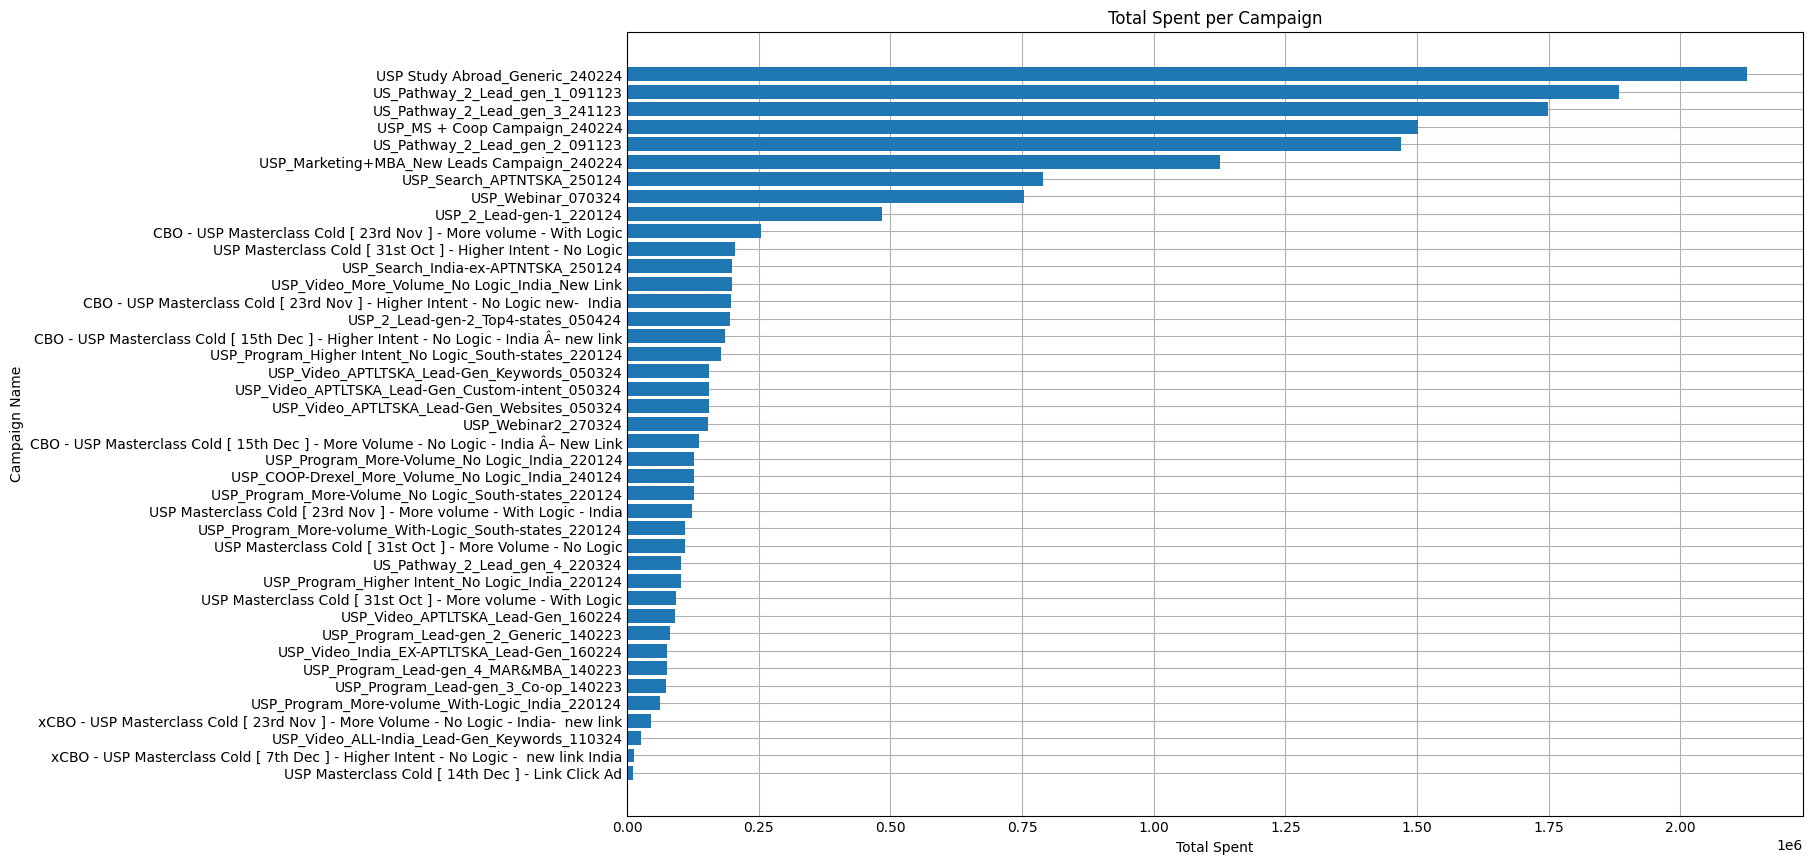

In [ ]:
# Group by 'campaign_name' and sum 'total_spent'
campaign_total_spent = df5.groupby('campaign_name')['total_spent'].sum().reset_index()

# Sort the DataFrame in descending order based on 'total_spent'
campaign_total_spent = campaign_total_spent.sort_values(by='total_spent', ascending=False)

# Print the result
print(campaign_total_spent)

# Plot the result as a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(campaign_total_spent['campaign_name'], campaign_total_spent['total_spent'])
plt.xlabel('Total Spent')
plt.ylabel('Campaign Name')
plt.title('Total Spent per Campaign')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.show()

                                        campaign_name  total_spent
9                     USP Study Abroad_Generic_240224   2126684.24
35                     US_Pathway_2_Lead_gen_1_091123   1884063.88
37                     US_Pathway_2_Lead_gen_3_241123   1749087.89
13                      USP_MS + Coop Campaign_240224   1501040.54
36                     US_Pathway_2_Lead_gen_2_091123   1469168.59
14        USP_Marketing+MBA_New Leads Campaign_240224   1125425.52
24                         USP_Search_APTNTSKA_250124    789571.12
34                                 USP_Webinar_070324    752657.01
10                            USP_2_Lead-gen-1_220124    484768.66
3   CBO - USP Masterclass Cold [ 23rd Nov ] - More...    254353.16
6   USP Masterclass Cold [ 31st Oct ] - Higher Int...    205642.99
25                USP_Search_India-ex-APTNTSKA_250124    199442.83
32      USP_Video_More_Volume_No Logic_India_New Link    198416.23
2   CBO - USP Masterclass Cold [ 23rd Nov ] - High...    19625

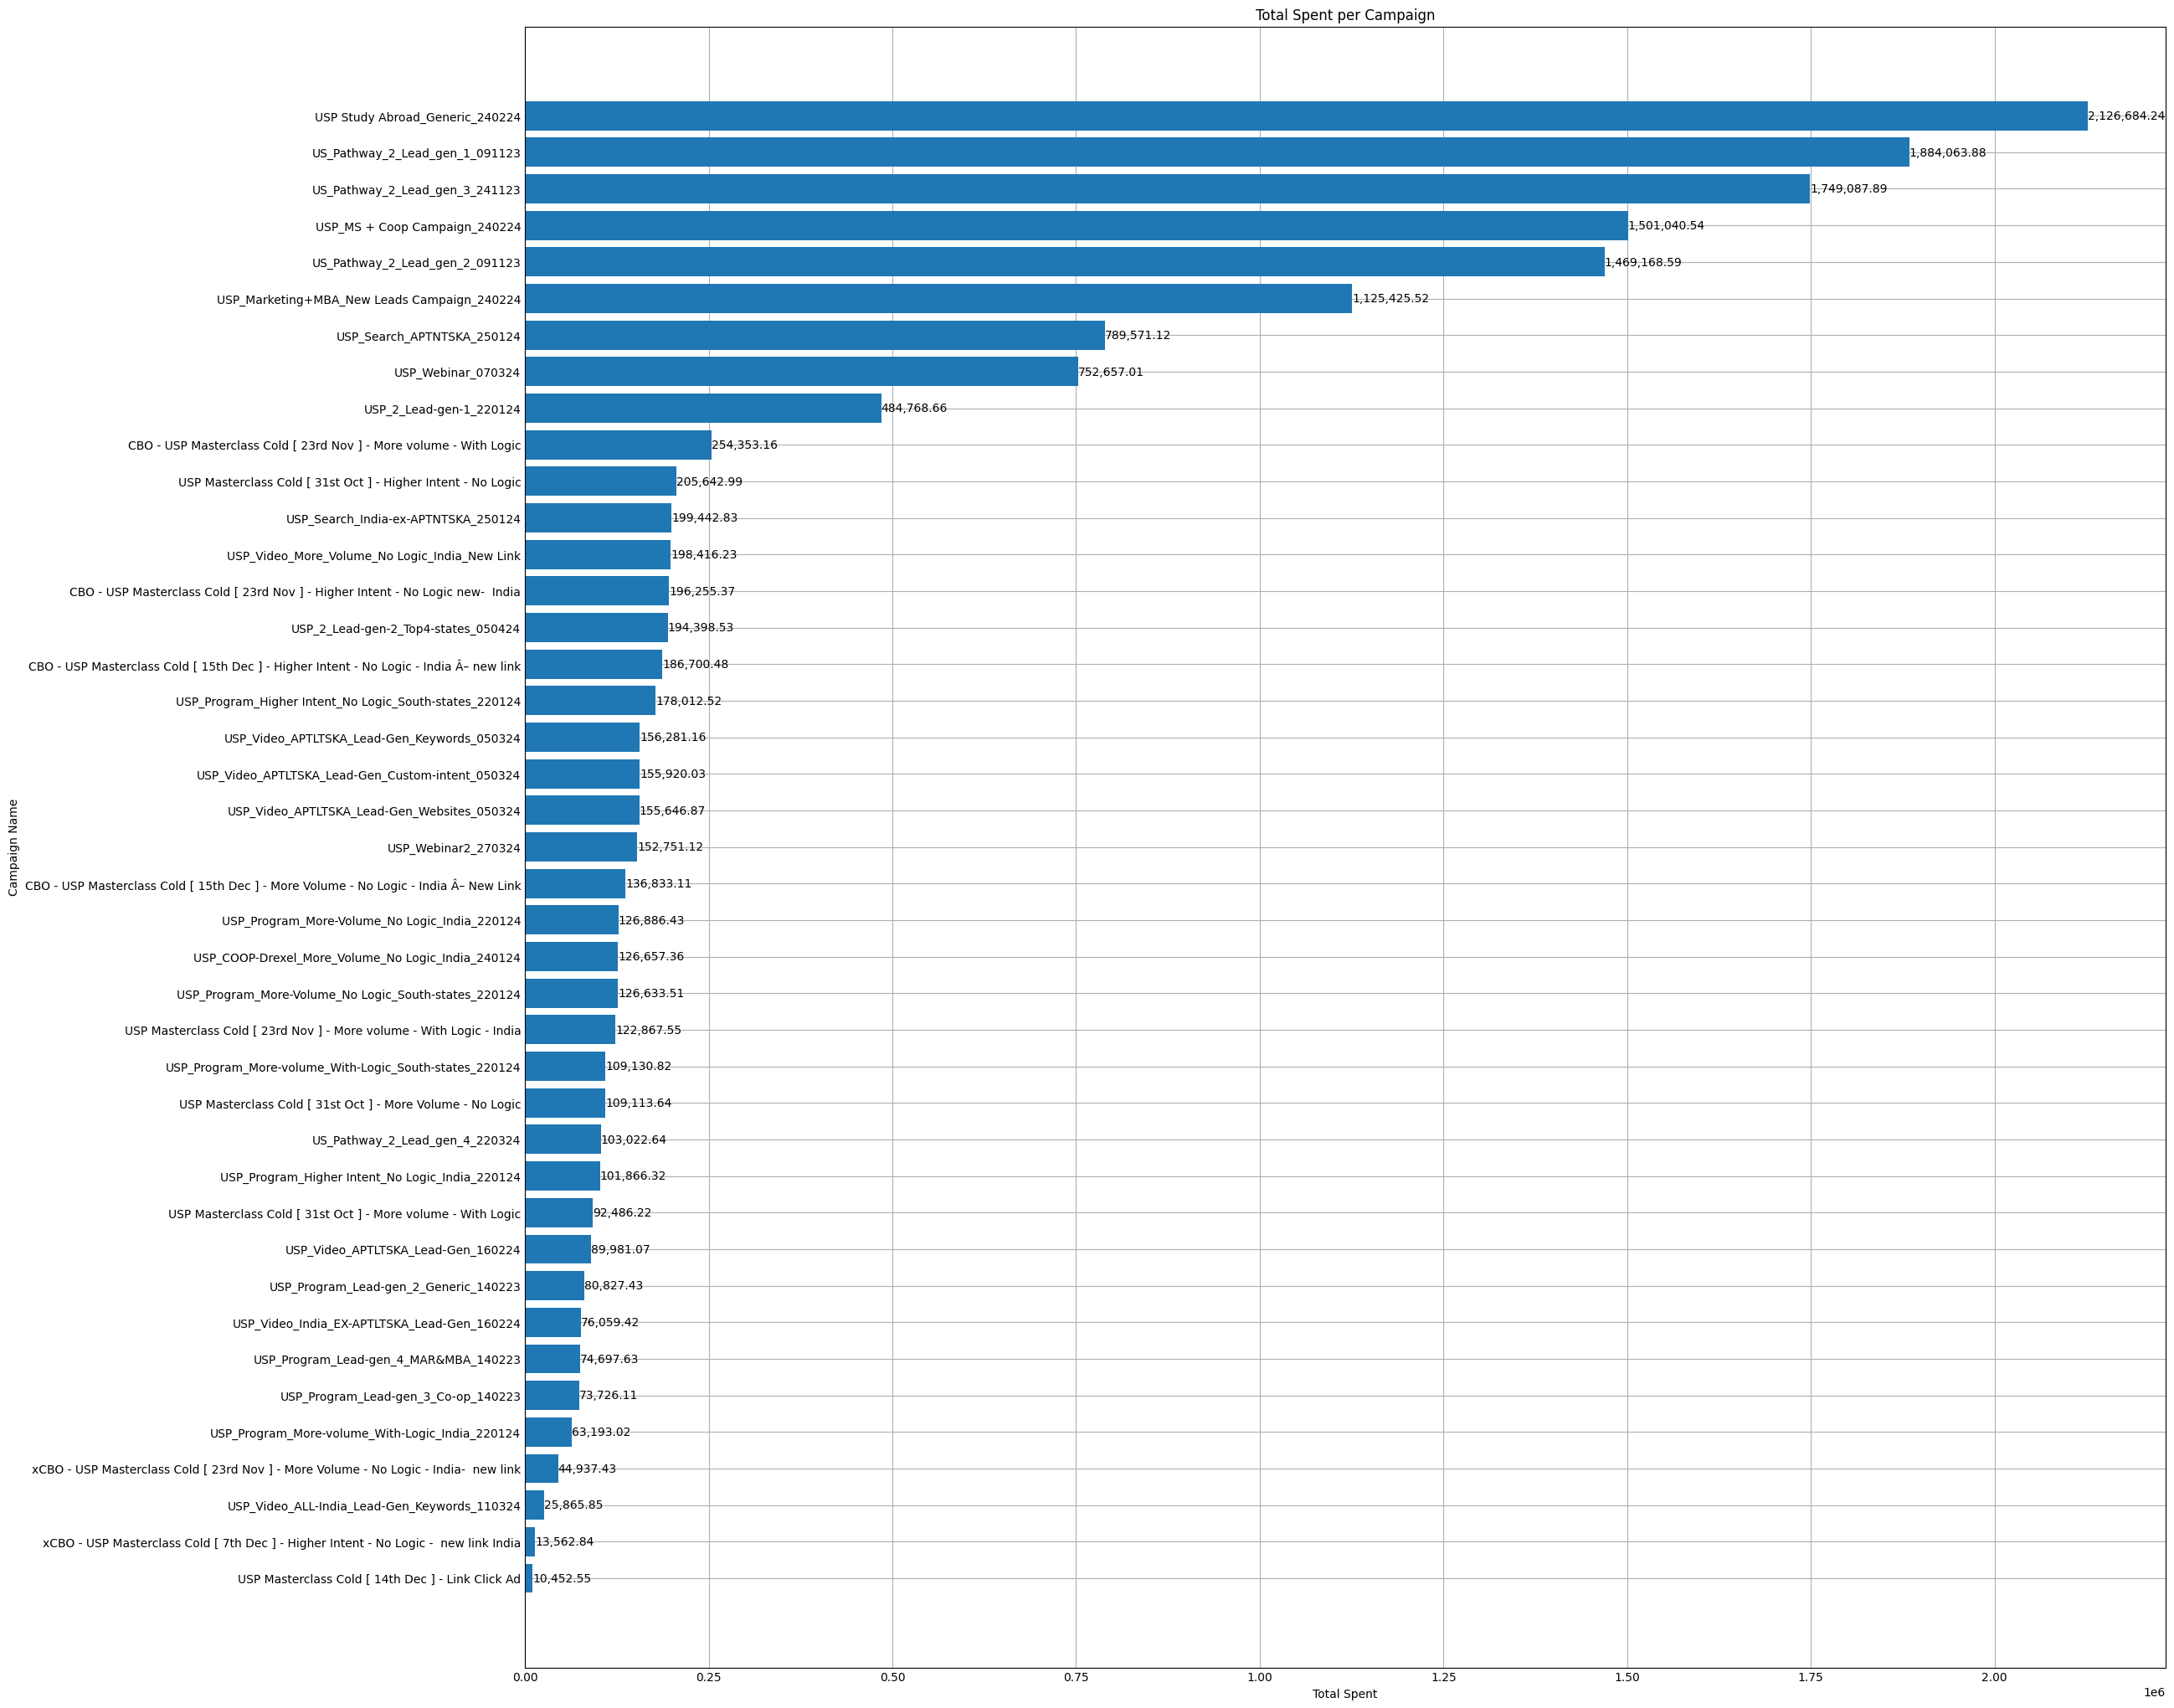

In [ ]:
# Group by 'campaign_name' and sum 'total_spent'
campaign_total_spent = df5.groupby('campaign_name')['total_spent'].sum().reset_index()

# Sort the DataFrame in descending order based on 'total_spent'
campaign_total_spent = campaign_total_spent.sort_values(by='total_spent', ascending=False)

# Print the result
print(campaign_total_spent)

# Plot the result as a horizontal bar chart
plt.figure(figsize=(20, 20))
ax = plt.gca()
bars = plt.barh(campaign_total_spent['campaign_name'], campaign_total_spent['total_spent'])
plt.xlabel('Total Spent')
plt.ylabel('Campaign Name')
plt.title('Total Spent per Campaign')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top

# Add annotations to the bars
for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.2f}',
            va='center', ha='left', color='black')

plt.show()


                                        campaign_name  impressions
0   CBO - USP Masterclass Cold [ 15th Dec ] - High...       610938
1   CBO - USP Masterclass Cold [ 15th Dec ] - More...      1302917
2   CBO - USP Masterclass Cold [ 23rd Nov ] - High...       862724
3   CBO - USP Masterclass Cold [ 23rd Nov ] - More...       868290
4   USP Masterclass Cold [ 14th Dec ] - Link Click Ad       871201
5   USP Masterclass Cold [ 23rd Nov ] - More volum...       527531
6   USP Masterclass Cold [ 31st Oct ] - Higher Int...       713599
7   USP Masterclass Cold [ 31st Oct ] - More Volum...       536447
8   USP Masterclass Cold [ 31st Oct ] - More volum...       326810
9                     USP Study Abroad_Generic_240224      9265548
10                            USP_2_Lead-gen-1_220124      1668181
11                USP_2_Lead-gen-2_Top4-states_050424       960204
12  USP_COOP-Drexel_More_Volume_No Logic_India_240124       395467
13                      USP_MS + Coop Campaign_240224      450

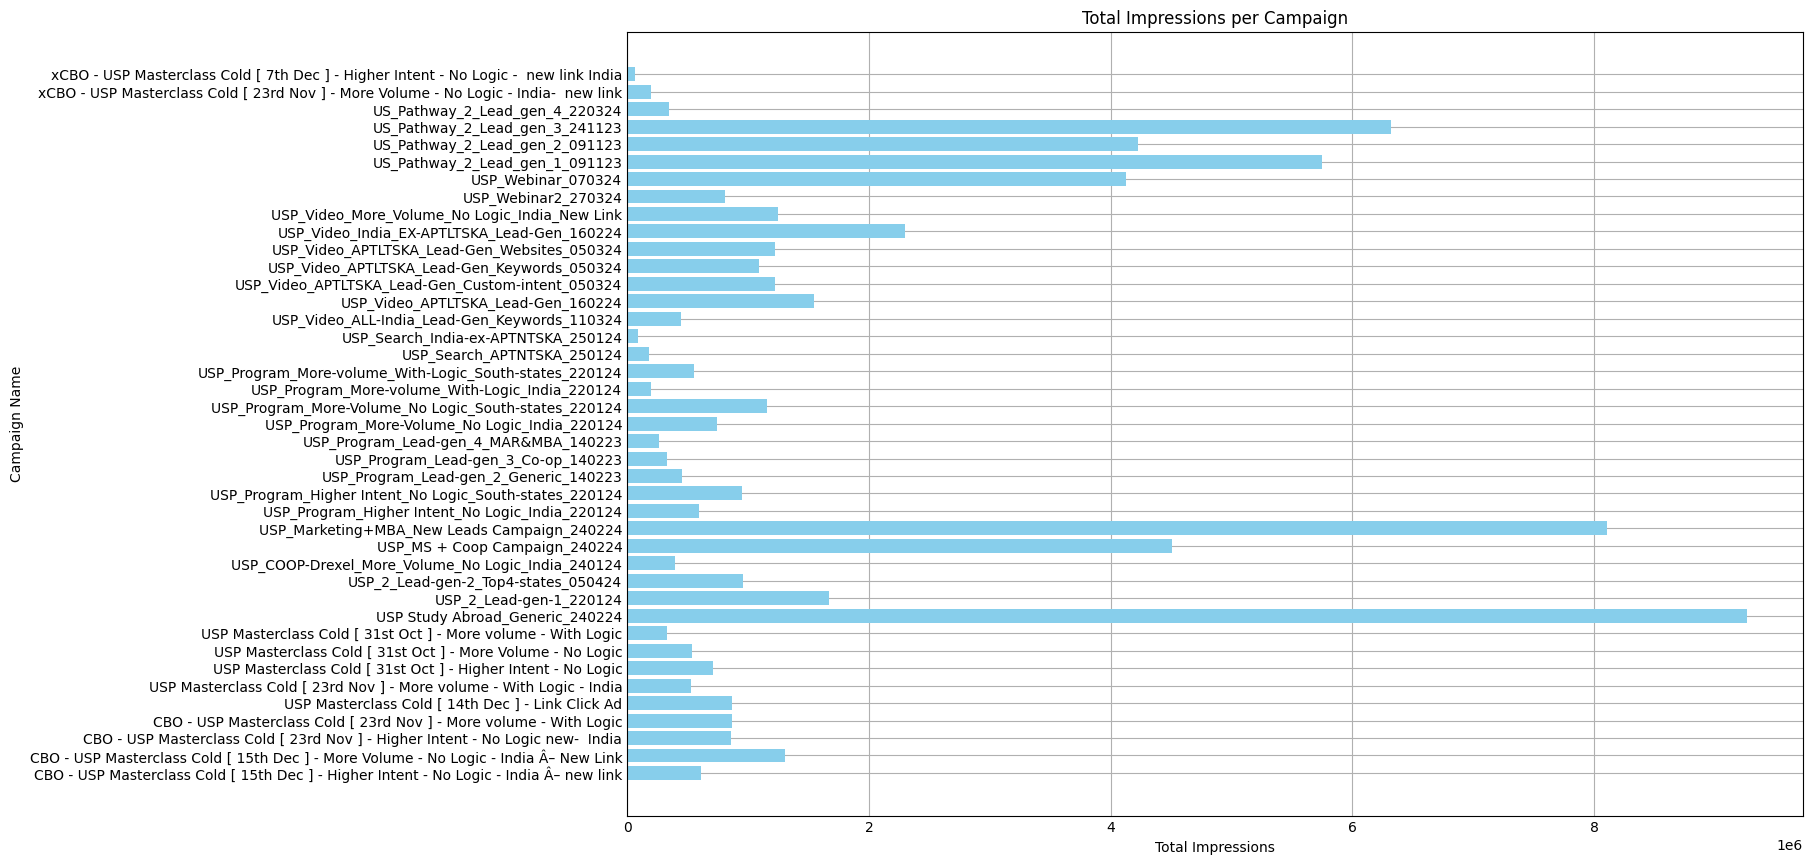

In [ ]:
# Group by 'campaign_name' and sum 'impressions'
campaign_impressions = df5.groupby('campaign_name')['impressions'].sum().reset_index()
# Print the result
print(campaign_impressions)
# Display the result
print("Total Impressions per Campaign:")
for index, row in campaign_impressions.iterrows():
    print(f"Campaign Name: {row['campaign_name']}, Total Impressions: {row['impressions']:,.0f}")
# Plot the result as a horizontal bar chart with annotations
plt.figure(figsize=(12, 8))
ax = plt.gca()
bars = plt.barh(campaign_impressions['campaign_name'], campaign_impressions['impressions'], color='skyblue')
plt.xlabel('Total Impressions')
plt.ylabel('Campaign Name')
plt.title('Total Impressions per Campaign')
plt.show()

                                        campaign_name  impressions
9                     USP Study Abroad_Generic_240224      9265548
14        USP_Marketing+MBA_New Leads Campaign_240224      8106285
37                     US_Pathway_2_Lead_gen_3_241123      6317435
35                     US_Pathway_2_Lead_gen_1_091123      5751255
13                      USP_MS + Coop Campaign_240224      4506382
36                     US_Pathway_2_Lead_gen_2_091123      4225764
34                                 USP_Webinar_070324      4125312
31        USP_Video_India_EX-APTLTSKA_Lead-Gen_160224      2302262
10                            USP_2_Lead-gen-1_220124      1668181
27                 USP_Video_APTLTSKA_Lead-Gen_160224      1546844
1   CBO - USP Masterclass Cold [ 15th Dec ] - More...      1302917
32      USP_Video_More_Volume_No Logic_India_New Link      1246514
30        USP_Video_APTLTSKA_Lead-Gen_Websites_050324      1226818
28   USP_Video_APTLTSKA_Lead-Gen_Custom-intent_050324      122

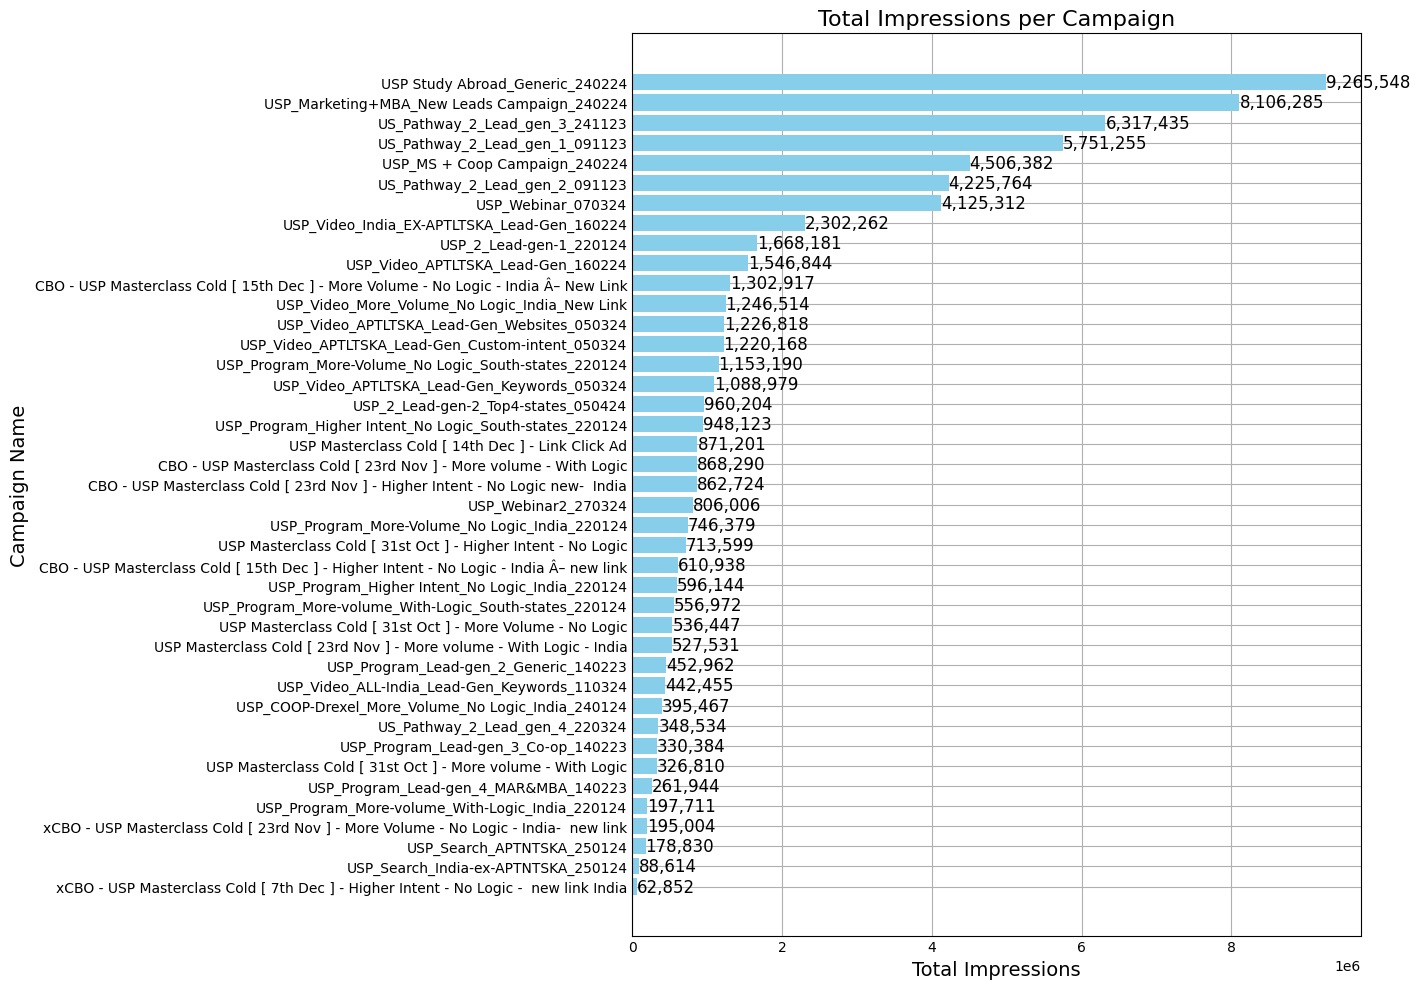

In [ ]:
# Group by 'campaign_name' and sum 'impressions'
campaign_impressions = df5.groupby('campaign_name')['impressions'].sum().reset_index()

# Sort the DataFrame in descending order based on 'impressions'
campaign_impressions = campaign_impressions.sort_values(by='impressions', ascending=False)

# Print the result
print(campaign_impressions)
# Display the result
print("Total Impressions per Campaign:")
for index, row in campaign_impressions.iterrows():
    print(f"Campaign Name: {row['campaign_name']}, Total Impressions: {row['impressions']:,.0f}")


# Plot the result as a horizontal bar chart with annotations
plt.figure(figsize=(14, 10))
ax = plt.gca()
bars = plt.barh(campaign_impressions['campaign_name'], campaign_impressions['impressions'], color='skyblue')
plt.xlabel('Total Impressions', fontsize=14)
plt.ylabel('Campaign Name', fontsize=14)
plt.title('Total Impressions per Campaign', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top

# Add annotations to the bars
for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f}',
            va='center', ha='left', color='black', fontsize=12)

# Adjust layout to fit the campaign names
plt.tight_layout()
plt.show()

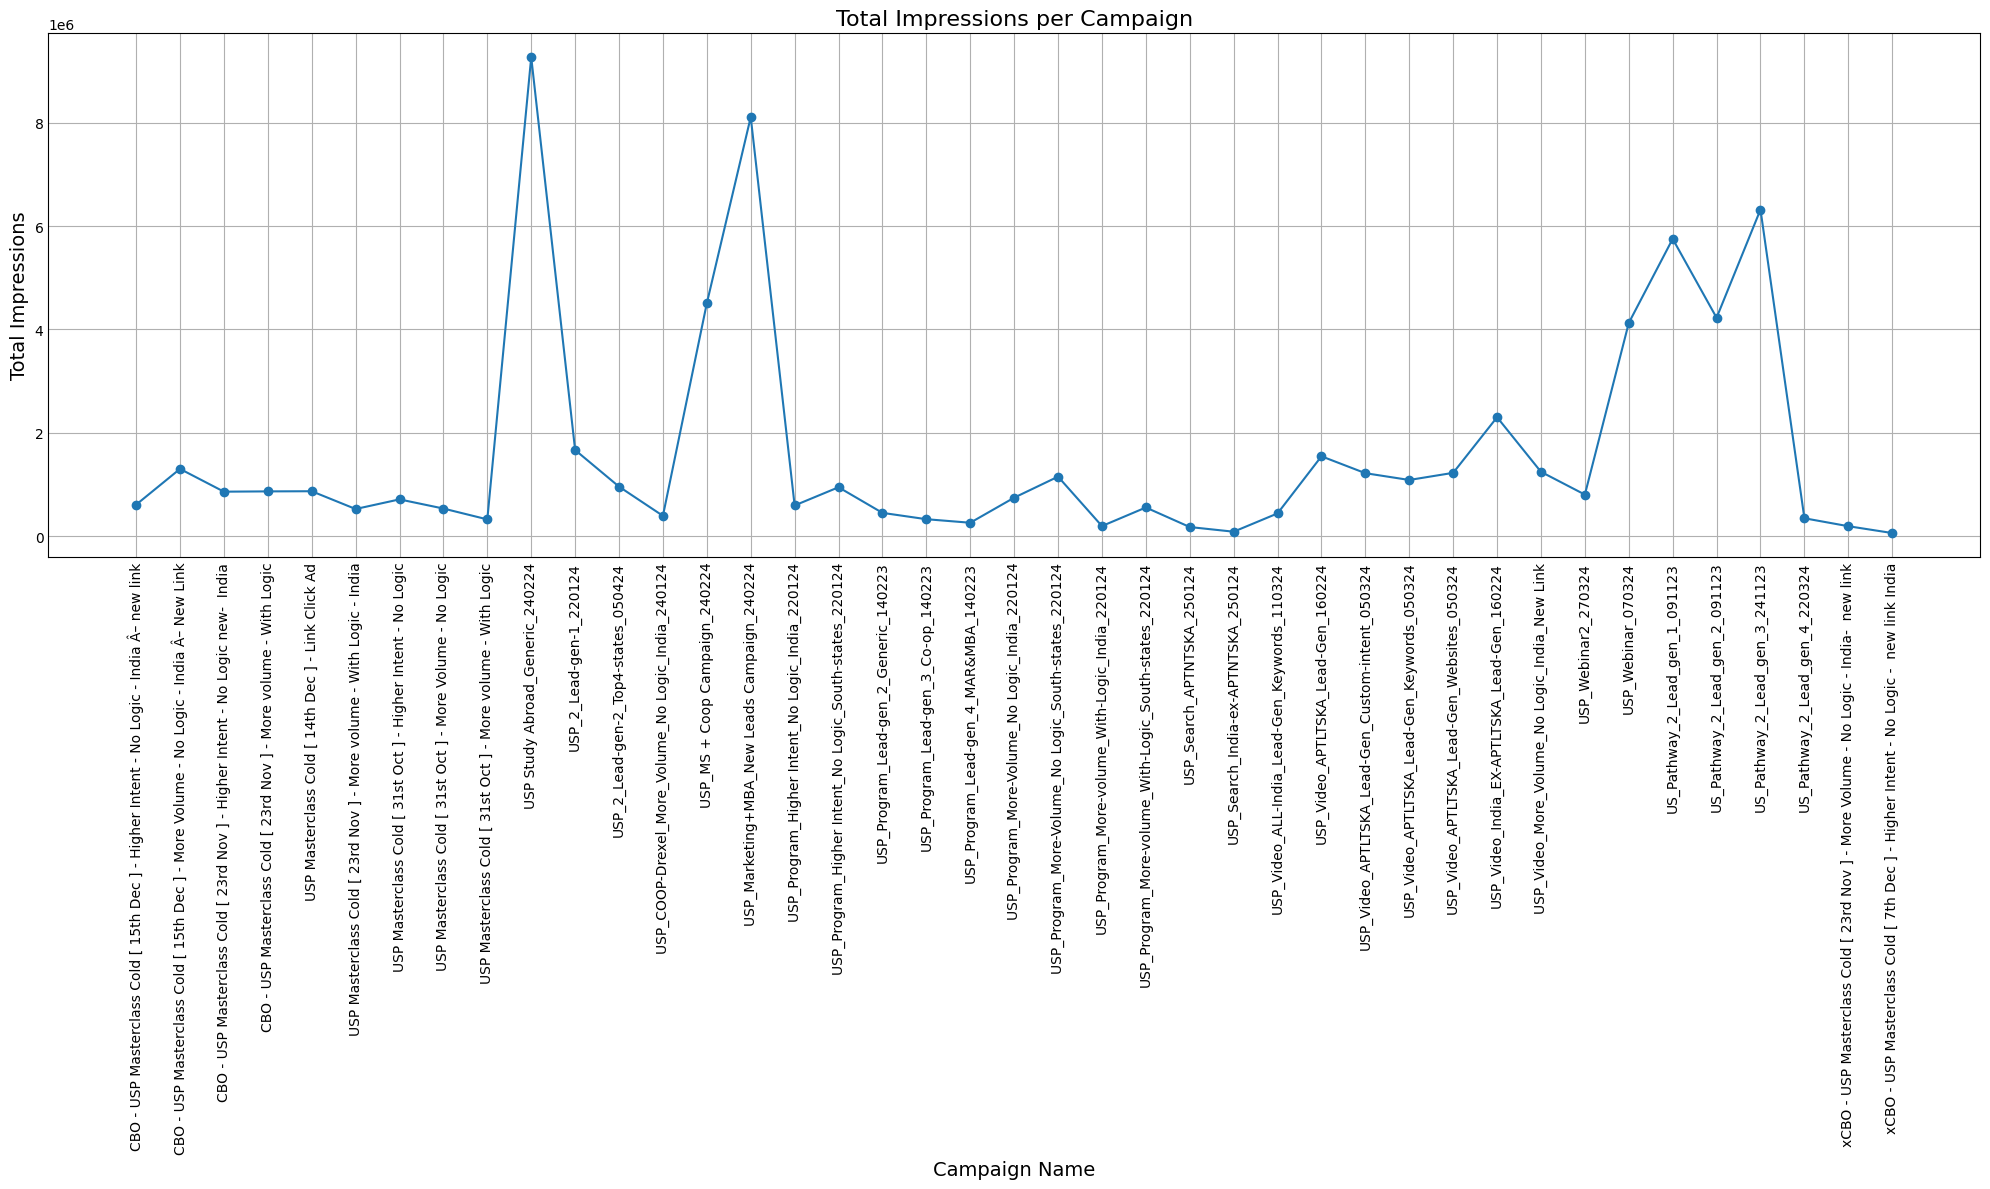

In [ ]:

# Group by 'campaign_name' and sum 'impressions'
campaign_impressions = df5.groupby('campaign_name')['impressions'].sum().reset_index()

# Sort the DataFrame in descending order based on 'impressions'
# campaign_impressions = campaign_impressions.sort_values(by='impressions', ascending=False)

# Plot the result as a line chart
plt.figure(figsize=(20, 12))
plt.plot(campaign_impressions['campaign_name'], campaign_impressions['impressions'], marker='o')
plt.xlabel('Campaign Name', fontsize=14)
plt.ylabel('Total Impressions', fontsize=14)
plt.title('Total Impressions per Campaign', fontsize=16)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

                                        campaign_name  clicks
0   CBO - USP Masterclass Cold [ 15th Dec ] - High...   12853
1   CBO - USP Masterclass Cold [ 15th Dec ] - More...    5505
2   CBO - USP Masterclass Cold [ 23rd Nov ] - High...    9469
3   CBO - USP Masterclass Cold [ 23rd Nov ] - More...   11100
4   USP Masterclass Cold [ 14th Dec ] - Link Click Ad   18578
5   USP Masterclass Cold [ 23rd Nov ] - More volum...    4542
6   USP Masterclass Cold [ 31st Oct ] - Higher Int...    7516
7   USP Masterclass Cold [ 31st Oct ] - More Volum...    4884
8   USP Masterclass Cold [ 31st Oct ] - More volum...    2939
9                     USP Study Abroad_Generic_240224   48531
10                            USP_2_Lead-gen-1_220124   10480
11                USP_2_Lead-gen-2_Top4-states_050424    3933
12  USP_COOP-Drexel_More_Volume_No Logic_India_240124    5238
13                      USP_MS + Coop Campaign_240224   27762
14        USP_Marketing+MBA_New Leads Campaign_240224   37727
15    US

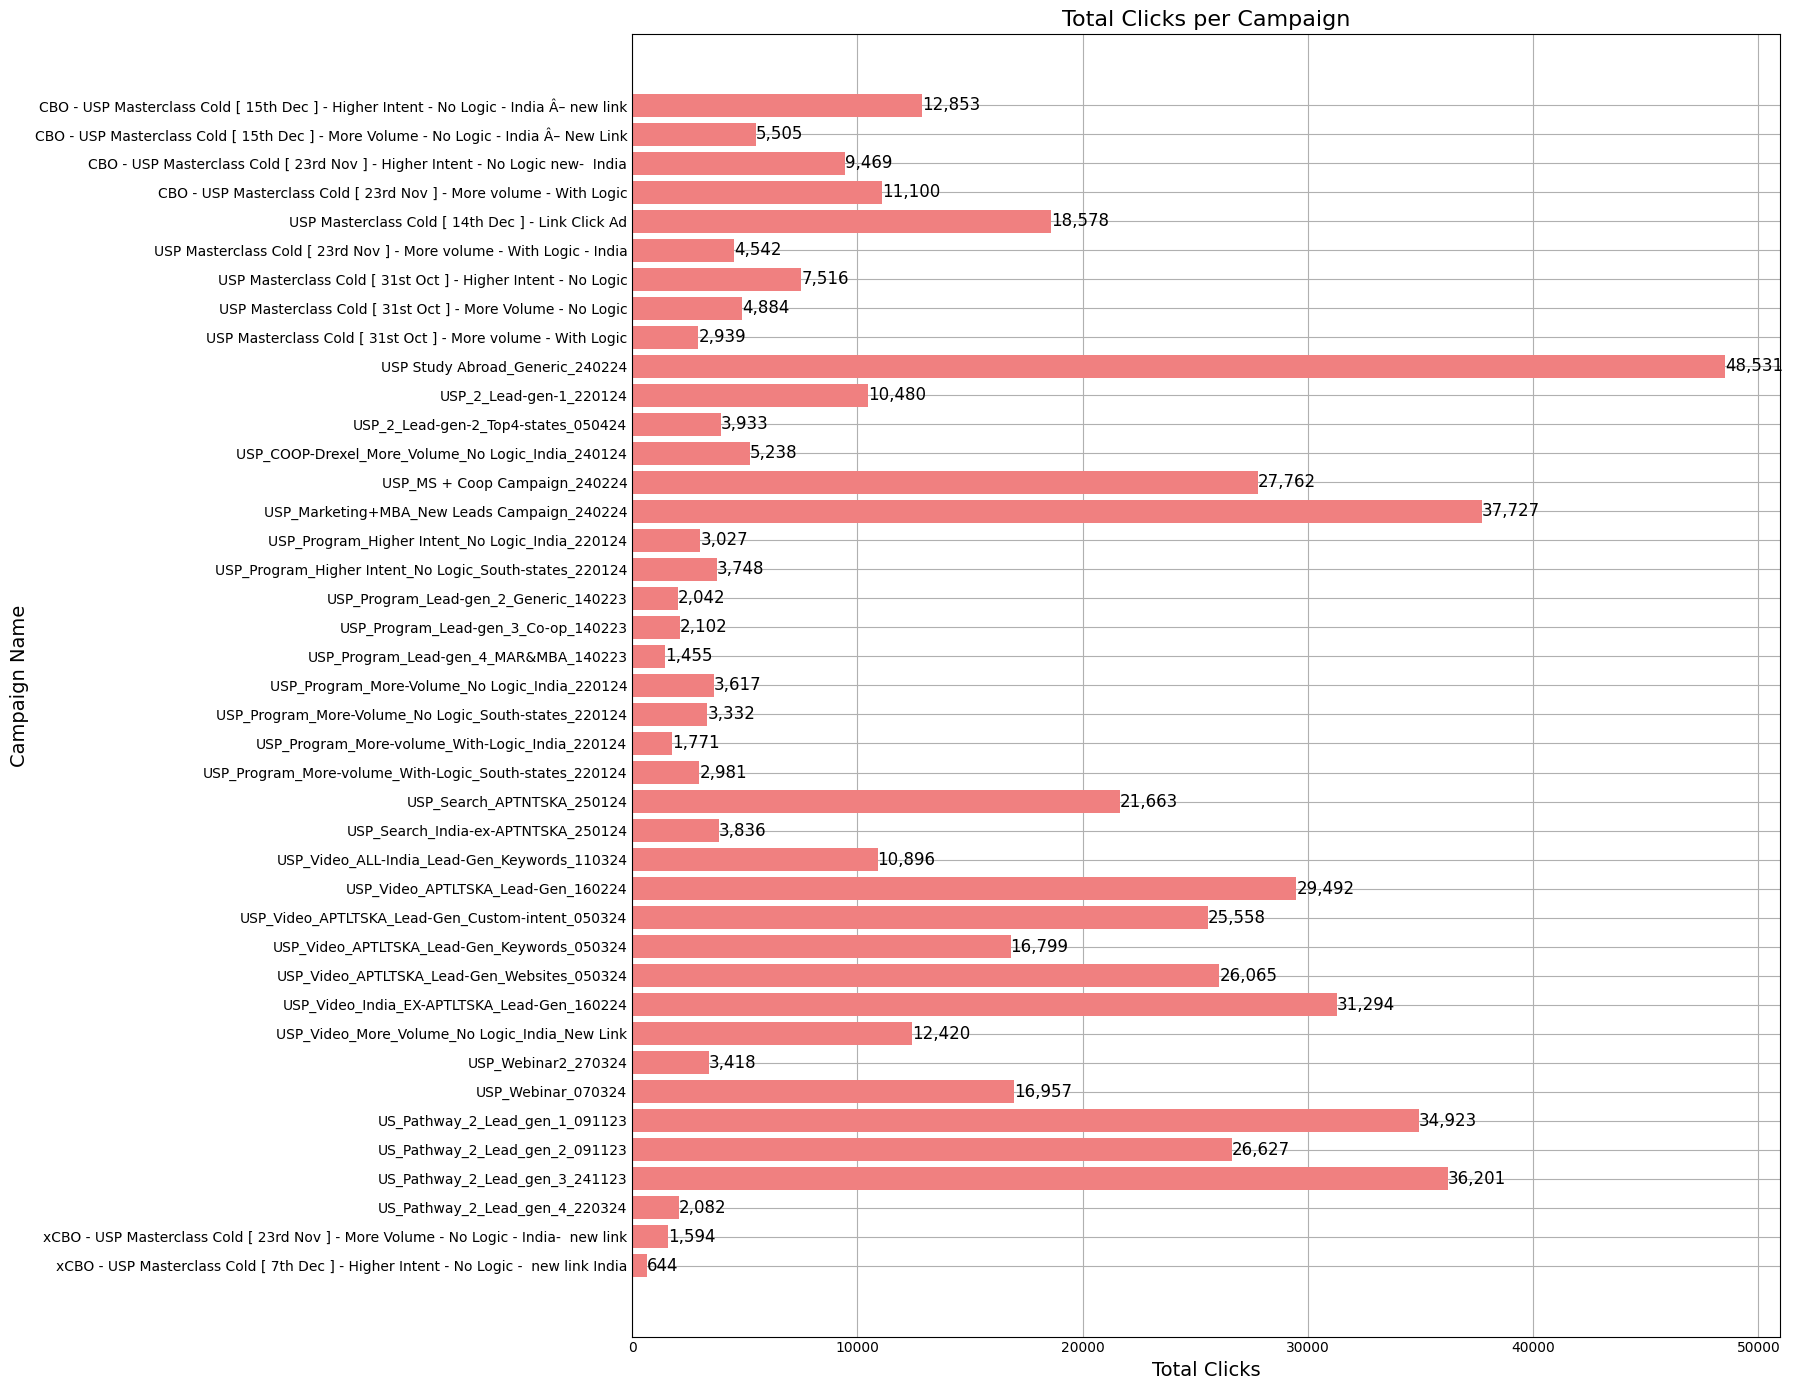

In [ ]:
# Group by 'campaign_name' and sum 'clicks'
campaign_clicks = df5.groupby('campaign_name')['clicks'].sum().reset_index()
# Print the result
print(campaign_clicks)

# Plot the result as a horizontal bar chart with annotations
plt.figure(figsize=(18, 14))
ax = plt.gca()
bars = plt.barh(campaign_clicks['campaign_name'], campaign_clicks['clicks'], color='lightcoral')
plt.xlabel('Total Clicks', fontsize=14)
plt.ylabel('Campaign Name', fontsize=14)
plt.title('Total Clicks per Campaign', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top

# Add annotations to the bars
for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f}',
            va='center', ha='left', color='black', fontsize=12)

plt.tight_layout()
plt.show()

                                        campaign_name  clicks
0   CBO - USP Masterclass Cold [ 15th Dec ] - High...   12853
1   CBO - USP Masterclass Cold [ 15th Dec ] - More...    5505
2   CBO - USP Masterclass Cold [ 23rd Nov ] - High...    9469
3   CBO - USP Masterclass Cold [ 23rd Nov ] - More...   11100
4   USP Masterclass Cold [ 14th Dec ] - Link Click Ad   18578
5   USP Masterclass Cold [ 23rd Nov ] - More volum...    4542
6   USP Masterclass Cold [ 31st Oct ] - Higher Int...    7516
7   USP Masterclass Cold [ 31st Oct ] - More Volum...    4884
8   USP Masterclass Cold [ 31st Oct ] - More volum...    2939
9                     USP Study Abroad_Generic_240224   48531
10                            USP_2_Lead-gen-1_220124   10480
11                USP_2_Lead-gen-2_Top4-states_050424    3933
12  USP_COOP-Drexel_More_Volume_No Logic_India_240124    5238
13                      USP_MS + Coop Campaign_240224   27762
14        USP_Marketing+MBA_New Leads Campaign_240224   37727
15    US

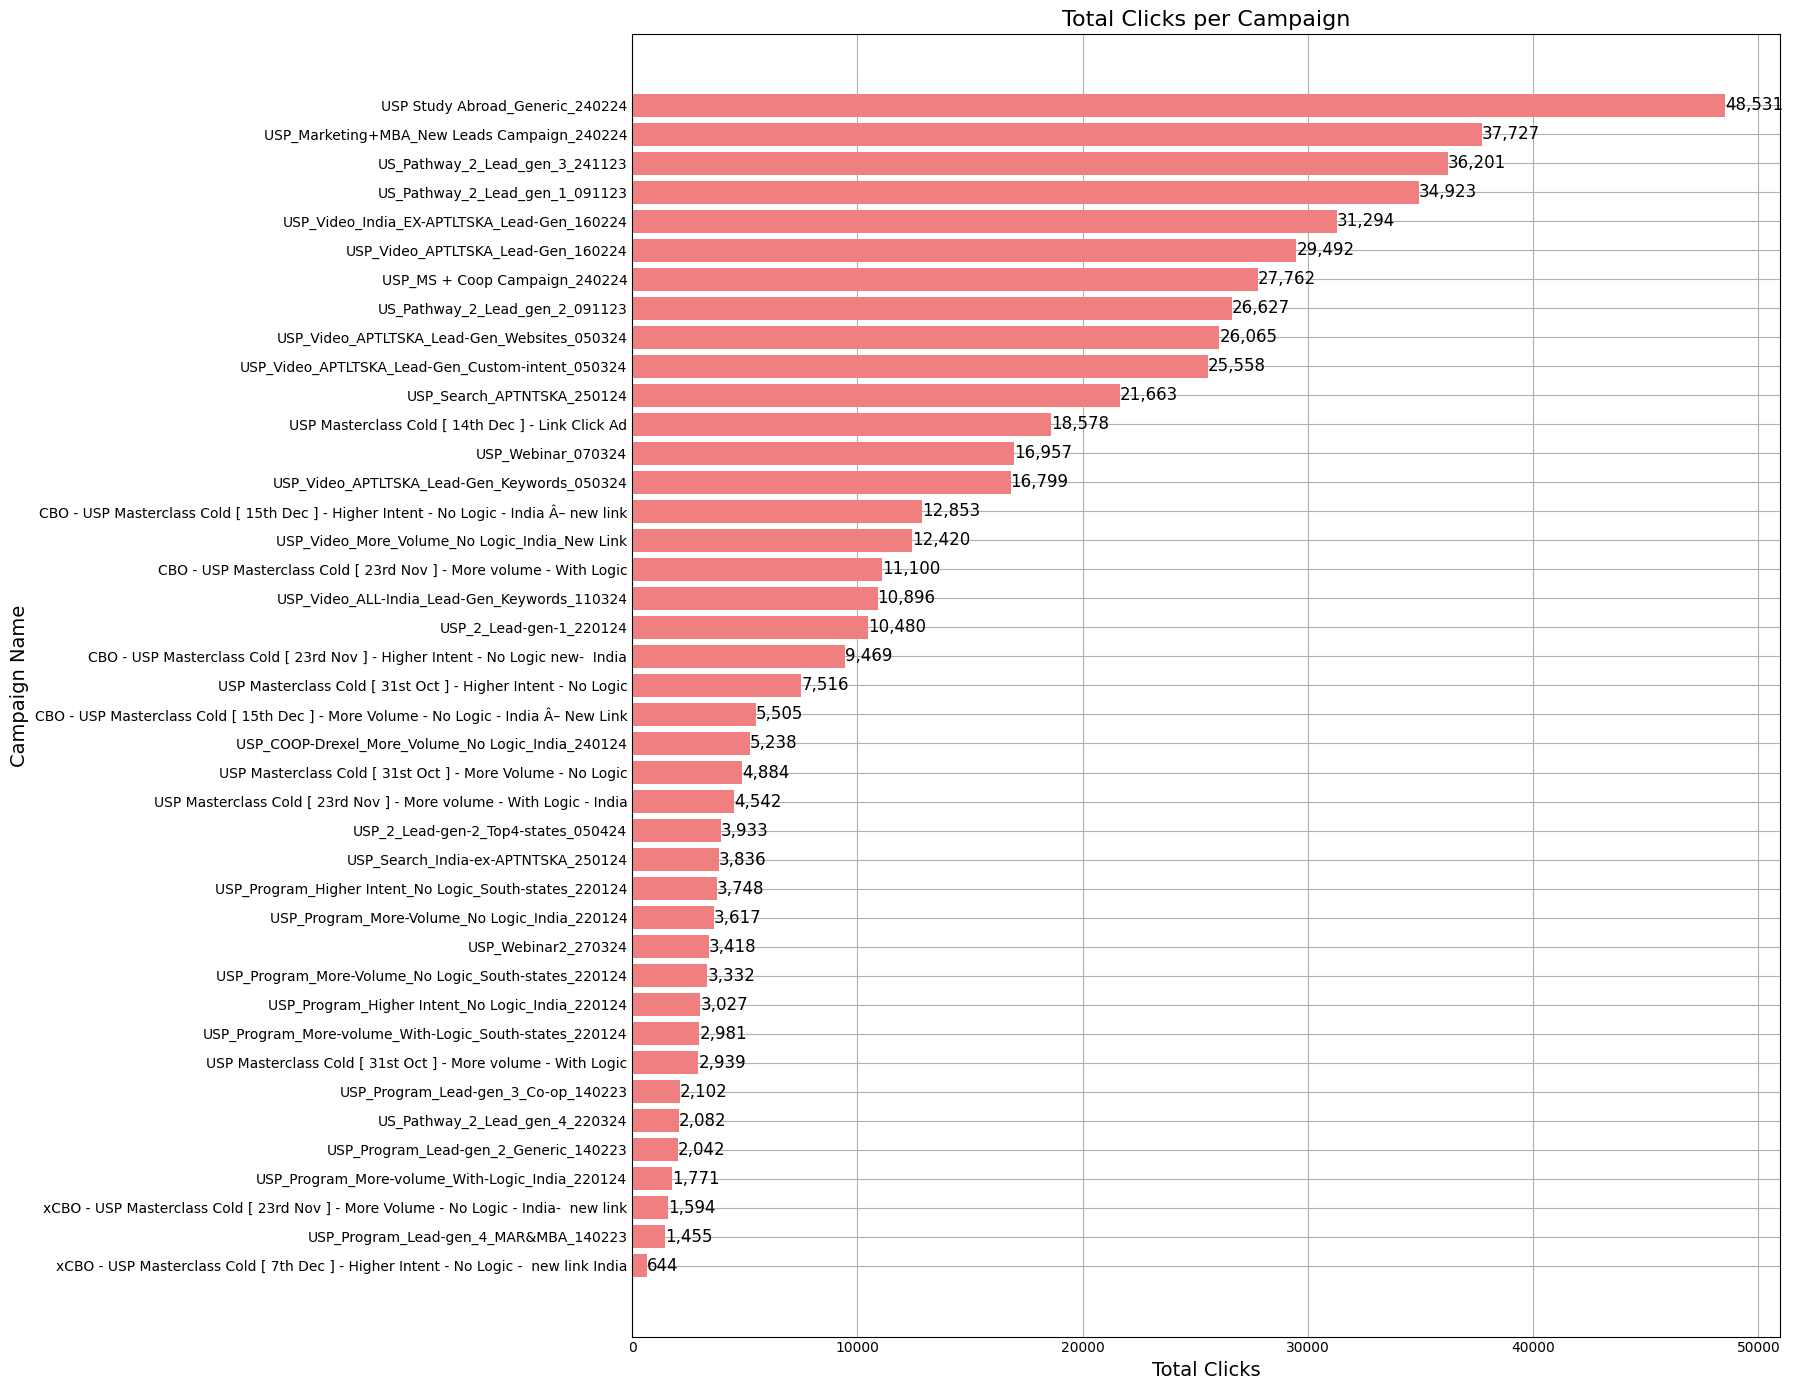

In [ ]:
# Group by 'campaign_name' and sum 'clicks'
campaign_clicks = df5.groupby('campaign_name')['clicks'].sum().reset_index()
# Print the result
print(campaign_clicks)

# Sort the DataFrame in descending order based on 'clicks'
campaign_clicks = campaign_clicks.sort_values(by='clicks', ascending=False)
# Display the result
print("Total Impressions per Campaign:")
for index, row in campaign_impressions.iterrows():
    print(f"Campaign Name: {row['campaign_name']}, Total Impressions: {row['impressions']:,.0f}")


# Plot the result as a horizontal bar chart with annotations
plt.figure(figsize=(18, 14))
ax = plt.gca()
bars = plt.barh(campaign_clicks['campaign_name'], campaign_clicks['clicks'], color='lightcoral')
plt.xlabel('Total Clicks', fontsize=14)
plt.ylabel('Campaign Name', fontsize=14)
plt.title('Total Clicks per Campaign', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top

# Add annotations to the bars
for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f}',
            va='center', ha='left', color='black', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# Calculate click_through_rate where it is missing and both clicks and impressions are available
missing_ctr_mask = df5['click_through_rate'].isna() & df5['clicks'].notna() & df5['impressions'].notna()

# Perform the calculation
df5.loc[missing_ctr_mask, 'click_through_rate'] = df5.loc[missing_ctr_mask, 'clicks'] / df5.loc[missing_ctr_mask, 'impressions']

# Display the updated DataFrame to check the changes
print(df5)

           dates                        campaign_name campaign_start_date  \
0     2024-04-29           USP_Search_APTNTSKA_250124                 NaT   
1     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424                 NaT   
2     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424                 NaT   
3     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424                 NaT   
4     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424                 NaT   
...          ...                                  ...                 ...   
28529 2024-03-12        USP_MS + Coop Campaign_240224                 NaT   
28530 2024-03-12        USP_MS + Coop Campaign_240224                 NaT   
28531 2024-03-12      USP Study Abroad_Generic_240224                 NaT   
28532 2024-03-12      USP Study Abroad_Generic_240224                 NaT   
28533 2024-03-12      USP Study Abroad_Generic_240224                 NaT   

                           creative_name  total_spent  impressions  clicks 

In [ ]:


# Function to calculate missing values by column# Funct
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:

# Missing values statistics
missing_values = missing_values_table(df5)
missing_values.head(23)


Your selected dataframe has 11 columns.
There are 3 columns that have missing values.


Missing Values  % of Total Values
campaign_start_date           24287               85.1
adset_name                     4247               14.9
click_through_rate               34                0.1

In [ ]:
null_values = df5['clicks'].isnull().sum()
print(f"Number of missing values in 'clicks' column: {null_values}")

Number of missing values in 'clicks' column: 0


In [ ]:
null_values = df5['impressions'].isnull().sum()
print(f"Number of missing values in 'impressions' column: {null_values}")

Number of missing values in 'impressions' column: 0


In [ ]:
# Display rows where 'click_through_rate' is missing
missing_click_through_rate_rows = df5[df5['click_through_rate'].isna()]

print("Rows with missing 'click_through_rate':")
print(missing_click_through_rate_rows)

Rows with missing 'click_through_rate':
           dates                                      campaign_name  \
677   2024-04-19                                 USP_Webinar_070324   
1462  2024-03-24                                 USP_Webinar_070324   
2996  2024-04-16                                USP_Webinar2_270324   
3069  2024-04-16                                USP_Webinar2_270324   
5063  2024-03-28                                 USP_Webinar_070324   
6097  2024-03-25                                 USP_Webinar_070324   
6540  2024-04-17                                 USP_Webinar_070324   
6566  2024-04-17                                 USP_Webinar_070324   
8977  2023-12-08  xCBO - USP Masterclass Cold [ 7th Dec ] - High...   
8982  2023-12-02  USP Masterclass Cold [ 31st Oct ] - More Volum...   
9876  2024-04-16                                 USP_Webinar_070324   
11361 2024-03-03                      USP_MS + Coop Campaign_240224   
11364 2024-03-02                     

In [ ]:
# Display rows where 'click_through_rate' is missing
missing_click_through_rate_rows = df5[df5['click_through_rate'].isna()]

print("Rows with missing 'click_through_rate':")
print(missing_click_through_rate_rows)

Rows with missing 'click_through_rate':
           dates                                      campaign_name  \
677   2024-04-19                                 USP_Webinar_070324   
1462  2024-03-24                                 USP_Webinar_070324   
2996  2024-04-16                                USP_Webinar2_270324   
3069  2024-04-16                                USP_Webinar2_270324   
5063  2024-03-28                                 USP_Webinar_070324   
6097  2024-03-25                                 USP_Webinar_070324   
6540  2024-04-17                                 USP_Webinar_070324   
6566  2024-04-17                                 USP_Webinar_070324   
8977  2023-12-08  xCBO - USP Masterclass Cold [ 7th Dec ] - High...   
8982  2023-12-02  USP Masterclass Cold [ 31st Oct ] - More Volum...   
9876  2024-04-16                                 USP_Webinar_070324   
11361 2024-03-03                      USP_MS + Coop Campaign_240224   
11364 2024-03-02                     

In [ ]:
# Calculate click_through_rate where it is missing and both clicks and impressions are available
missing_ctr_mask = df5['click_through_rate'].isna() & df5['clicks'].notna() & df5['impressions'].notna()

# Perform the calculation for missing values
df5.loc[missing_ctr_mask, 'click_through_rate'] = df5.loc[missing_ctr_mask, 'clicks'] / df5.loc[missing_ctr_mask, 'impressions']

# Fill remaining missing values in click_through_rate with 0
df5['click_through_rate'] = df5['click_through_rate'].fillna(0)

# Display the updated DataFrame to check the changes
print(df5)

           dates                        campaign_name campaign_start_date  \
0     2024-04-29           USP_Search_APTNTSKA_250124                 NaT   
1     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424                 NaT   
2     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424                 NaT   
3     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424                 NaT   
4     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424                 NaT   
...          ...                                  ...                 ...   
28529 2024-03-12        USP_MS + Coop Campaign_240224                 NaT   
28530 2024-03-12        USP_MS + Coop Campaign_240224                 NaT   
28531 2024-03-12      USP Study Abroad_Generic_240224                 NaT   
28532 2024-03-12      USP Study Abroad_Generic_240224                 NaT   
28533 2024-03-12      USP Study Abroad_Generic_240224                 NaT   

                           creative_name  total_spent  impressions  clicks 

In [ ]:
# Missing values statistics
missing_values = missing_values_table(df5)
missing_values.head(23)

Your selected dataframe has 11 columns.
There are 2 columns that have missing values.


Missing Values  % of Total Values
campaign_start_date           28534              100.0
adset_name                     4247               14.9

In [ ]:
# Extract the date from 'campaign_name' and update 'campaign_start_date'
df5['campaign_start_date'] = df5['campaign_name'].str.split('_').str[-1]

# Save the updated DataFrame back to an Excel file
df5.to_excel('updated_dataset.xlsx', index=False)

print("Updated DataFrame saved to 'updated_dataset.xlsx'")
print(df5)

Updated DataFrame saved to 'updated_dataset.xlsx'
           dates                        campaign_name campaign_start_date  \
0     2024-04-29           USP_Search_APTNTSKA_250124              250124   
1     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424              050424   
2     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424              050424   
3     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424              050424   
4     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424              050424   
...          ...                                  ...                 ...   
28529 2024-03-12        USP_MS + Coop Campaign_240224              240224   
28530 2024-03-12        USP_MS + Coop Campaign_240224              240224   
28531 2024-03-12      USP Study Abroad_Generic_240224              240224   
28532 2024-03-12      USP Study Abroad_Generic_240224              240224   
28533 2024-03-12      USP Study Abroad_Generic_240224              240224   

                         

In [ ]:
# Extract the date from 'campaign_name'
df5['campaign_start_date'] = df5['campaign_name'].str.split('_').str[-1]

# Function to convert the extracted date string to the desired format
def convert_to_date(date_str):
    return pd.to_datetime(date_str, format='%d%m%y').strftime('%d-%m-%Y')

# Apply the function to the 'campaign_start_date' column
df5['campaign_start_date'] = df5['campaign_start_date'].apply(convert_to_date)

# Save the updated DataFrame back to an Excel file
df5.to_excel('updated_dataset.xlsx', index=False)

print("Updated DataFrame saved to 'updated_dataset.xlsx'")
print(df5)

ValueError: time data "CBO - USP Masterclass Cold [ 23rd Nov ] - Higher Intent - No Logic new-  India" doesn't match format "%d%m%y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
# Missing values statistics
missing_values = missing_values_table(df5)
missing_values.head(23)

Your selected dataframe has 11 columns.
There are 1 columns that have missing values.


Missing Values  % of Total Values
adset_name            4247               14.9

In [ ]:
import pandas as pd
import re


# Function to extract and convert the date
def extract_and_convert_date(campaign_name):
    if '_' in campaign_name:
        match = re.search(r'_(\d{6})$', campaign_name)
        if match:
            date_str = match.group(1)
            # Convert to date format DD-MM-YYYY
            return pd.to_datetime(date_str, format='%d%m%y').strftime('%d-%m-%Y')
    return None

# Apply the function to the 'campaign_name' column
df5['campaign_start_date'] = df5['campaign_name'].apply(extract_and_convert_date)

# Save the updated DataFrame back to an Excel file
df5.to_excel('updated_dataset.xlsx', index=False)

print("Updated DataFrame saved to 'updated_dataset.xlsx'")
print(df5)

Updated DataFrame saved to 'updated_dataset.xlsx'
           dates                        campaign_name campaign_start_date  \
0     2024-04-29           USP_Search_APTNTSKA_250124          25-01-2024   
1     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          05-04-2024   
2     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          05-04-2024   
3     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          05-04-2024   
4     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          05-04-2024   
...          ...                                  ...                 ...   
28529 2024-03-12        USP_MS + Coop Campaign_240224          24-02-2024   
28530 2024-03-12        USP_MS + Coop Campaign_240224          24-02-2024   
28531 2024-03-12      USP Study Abroad_Generic_240224          24-02-2024   
28532 2024-03-12      USP Study Abroad_Generic_240224          24-02-2024   
28533 2024-03-12      USP Study Abroad_Generic_240224          24-02-2024   

                         

In [ ]:
# Missing values statistics
missing_values = missing_values_table(df5)
missing_values.head(23)

Your selected dataframe has 11 columns.
There are 2 columns that have missing values.


Missing Values  % of Total Values
campaign_start_date            9105               31.9
adset_name                     4247               14.9

In [ ]:
df5['campaign_start_date'].fillna('Not Available', inplace=True)
print(df5)

           dates                        campaign_name campaign_start_date  \
0     2024-04-29           USP_Search_APTNTSKA_250124          25-01-2024   
1     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          05-04-2024   
2     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          05-04-2024   
3     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          05-04-2024   
4     2024-05-02  USP_2_Lead-gen-2_Top4-states_050424          05-04-2024   
...          ...                                  ...                 ...   
28529 2024-03-12        USP_MS + Coop Campaign_240224          24-02-2024   
28530 2024-03-12        USP_MS + Coop Campaign_240224          24-02-2024   
28531 2024-03-12      USP Study Abroad_Generic_240224          24-02-2024   
28532 2024-03-12      USP Study Abroad_Generic_240224          24-02-2024   
28533 2024-03-12      USP Study Abroad_Generic_240224          24-02-2024   

                           creative_name  total_spent  impressions  clicks 

In [ ]:
# Missing values statistics
missing_values = missing_values_table(df5)
missing_values.head(23)

Your selected dataframe has 11 columns.
There are 1 columns that have missing values.


Missing Values  % of Total Values
adset_name            4247               14.9

Total Leads per Campaign:
                                        campaign_name    leads
9                     USP Study Abroad_Generic_240224  4630.00
13                      USP_MS + Coop Campaign_240224  4446.00
14        USP_Marketing+MBA_New Leads Campaign_240224  2390.00
10                            USP_2_Lead-gen-1_220124  2124.00
32      USP_Video_More_Volume_No Logic_India_New Link  1866.00
34                                 USP_Webinar_070324  1616.00
24                         USP_Search_APTNTSKA_250124  1360.00
0   CBO - USP Masterclass Cold [ 15th Dec ] - High...  1346.00
35                     US_Pathway_2_Lead_gen_1_091123  1232.00
12  USP_COOP-Drexel_More_Volume_No Logic_India_240124  1096.00
2   CBO - USP Masterclass Cold [ 23rd Nov ] - High...  1093.00
6   USP Masterclass Cold [ 31st Oct ] - Higher Int...   888.00
37                     US_Pathway_2_Lead_gen_3_241123   874.00
3   CBO - USP Masterclass Cold [ 23rd Nov ] - More...   731.00
36                     US_Pat

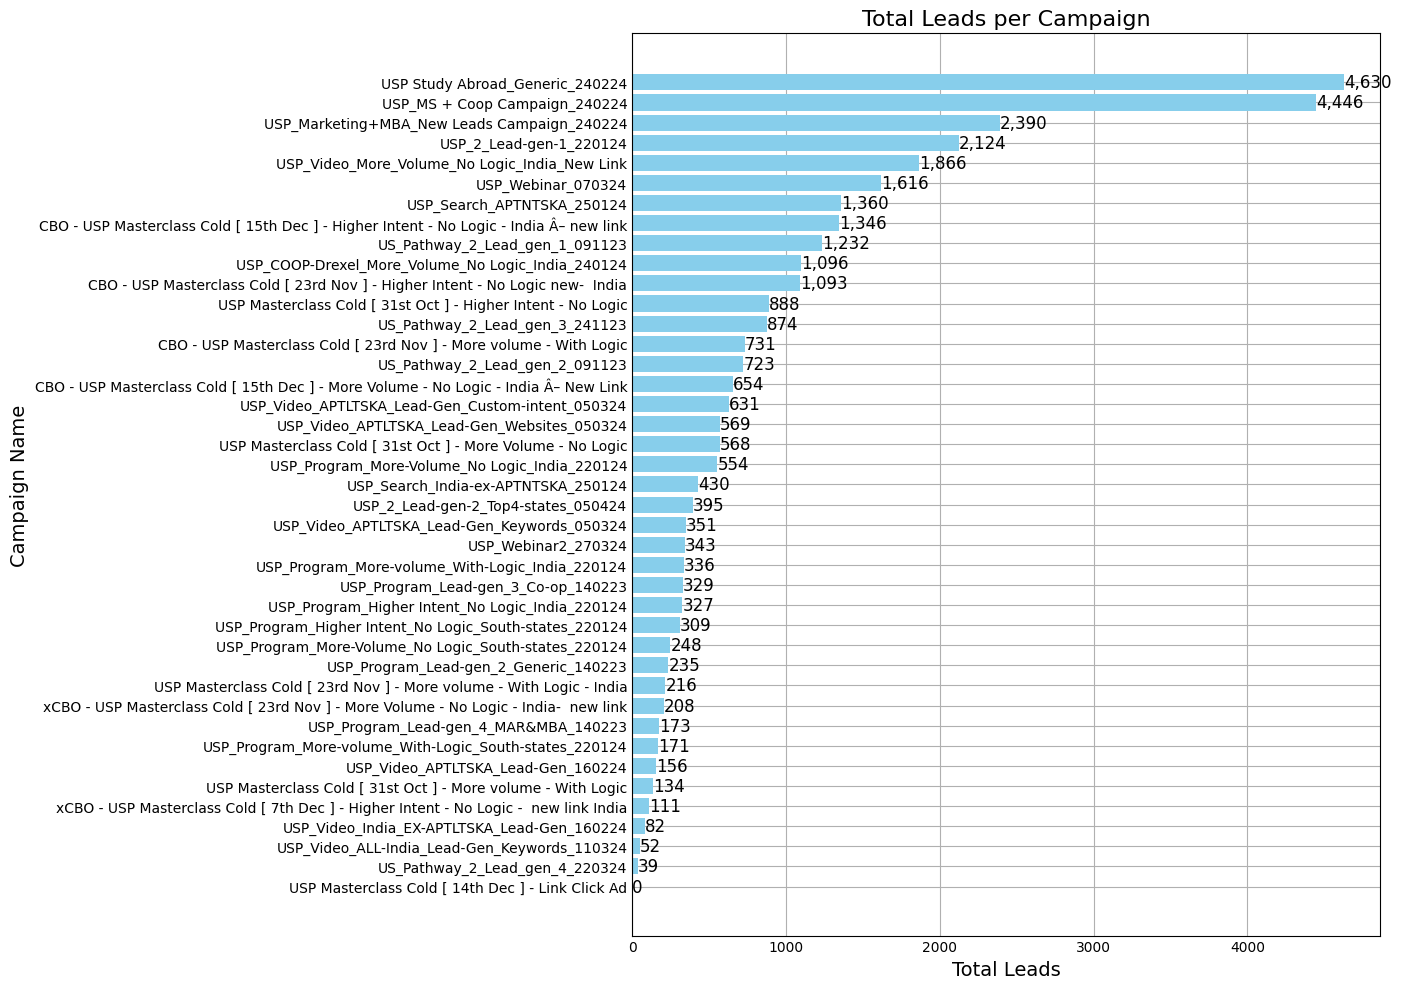

In [ ]:
# Group by 'campaign_name' and sum 'leads'
campaign_leads = df5.groupby('campaign_name')['leads'].sum().reset_index()

# Sort the DataFrame in descending order based on 'leads'
campaign_leads = campaign_leads.sort_values(by='leads', ascending=False)

# Print the result
print("Total Leads per Campaign:")
print(campaign_leads)

# Display the result as a text output
for index, row in campaign_leads.iterrows():
    print(f"Campaign Name: {row['campaign_name']}, Total Leads: {row['leads']}")

import matplotlib.pyplot as plt

# Plot the result as a horizontal bar chart with annotations
plt.figure(figsize=(14, 10))
ax = plt.gca()
bars = plt.barh(campaign_leads['campaign_name'], campaign_leads['leads'], color='skyblue')
plt.xlabel('Total Leads', fontsize=14)
plt.ylabel('Campaign Name', fontsize=14)
plt.title('Total Leads per Campaign', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top

# Add annotations to the bars
for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f}',
            va='center', ha='left', color='black', fontsize=12)

plt.tight_layout()
plt.show()


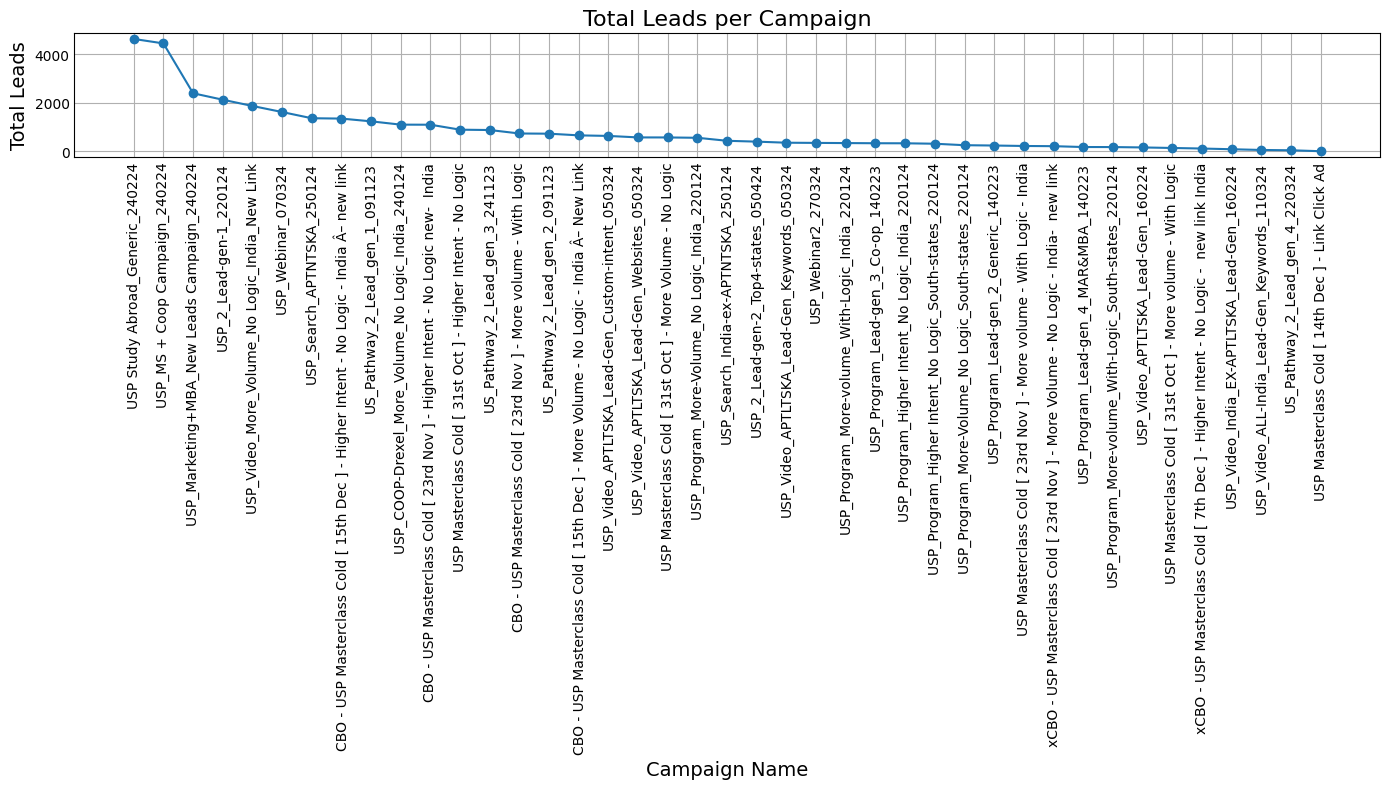

In [ ]:
import matplotlib.pyplot as plt

# Plot the result as a line chart
plt.figure(figsize=(14, 8))
plt.plot(campaign_leads['campaign_name'], campaign_leads['leads'], marker='o')
plt.xlabel('Campaign Name', fontsize=14)
plt.ylabel('Total Leads', fontsize=14)
plt.title('Total Leads per Campaign', fontsize=16)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:


# Count the number of campaigns per platform
campaign_counts = df5['platform'].value_counts()

print("Campaign counts per platform:")
print(campaign_counts)

Campaign counts per platform:
platform
Facebook    23530
LinkedIn     4247
Google        757
Name: count, dtype: int64


In [ ]:
# Group by platform and summarize metrics
summary = df5.groupby('platform').agg({
    'impressions': 'sum',
    'clicks': 'sum'
}).reset_index()

# Calculate additional metrics like Click Through Rate (CTR)
summary['CTR'] = (summary['clicks'] / summary['impressions']) * 100

print("Summary by platform:")
print(summary)

Summary by platform:
   platform  impressions  clicks       CTR
0  Facebook     43202021  270165  0.625353
1    Google      8094970  165603  2.045752
2  LinkedIn     16642988   99833  0.599850


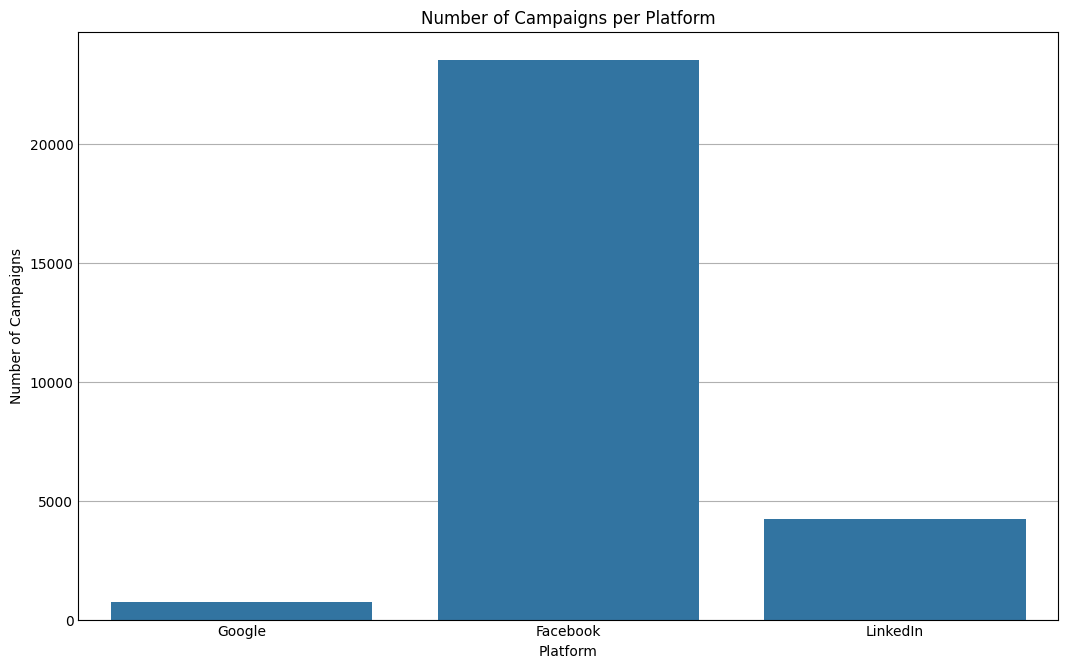

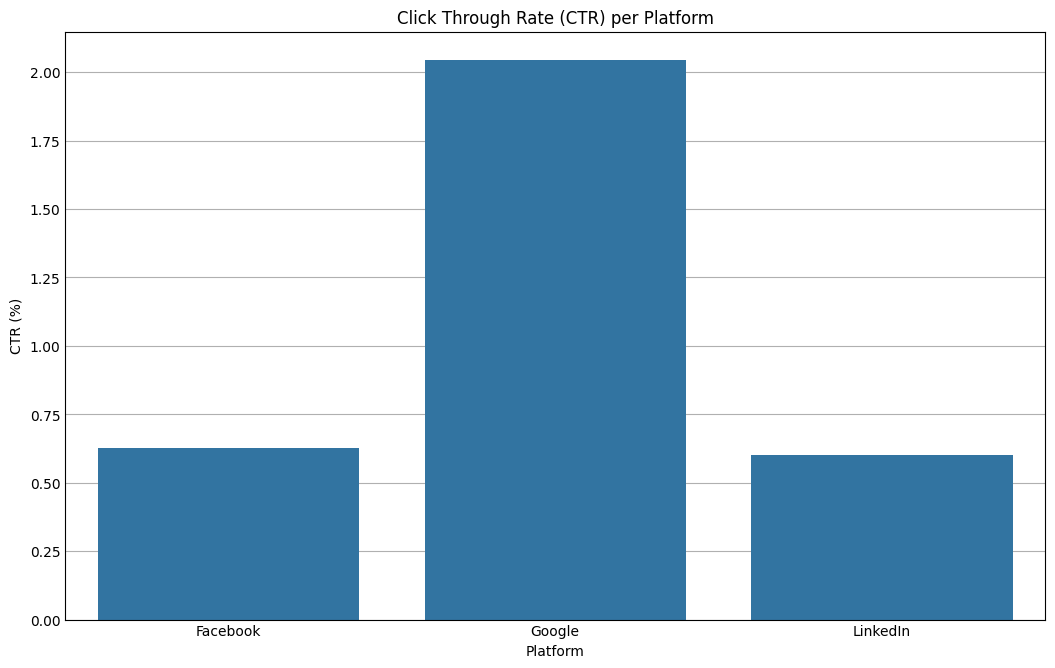

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the number of campaigns per platform
plt.figure(figsize=(10, 6))
sns.countplot(data=df5, x='platform')
plt.title('Number of Campaigns per Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Campaigns')
plt.show()

# Plot Click Through Rate (CTR) per platform
plt.figure(figsize=(10, 6))
sns.barplot(data=summary, x='platform', y='CTR')
plt.title('Click Through Rate (CTR) per Platform')
plt.xlabel('Platform')
plt.ylabel('CTR (%)')
plt.show()

In [ ]:
# Count the number of campaigns of each type per platform
campaign_type_counts = df5.groupby(['platform', 'campaign_name']).size().unstack(fill_value=0)

print("Number of campaigns of each type per platform:")
print(campaign_type_counts)

Number of campaigns of each type per platform:
campaign_name  CBO - USP Masterclass Cold [ 15th Dec ] - Higher Intent - No Logic - India Â– new link  \
platform                                                                                                
Facebook                                                     515                                        
Google                                                         0                                        
LinkedIn                                                       0                                        

campaign_name  CBO - USP Masterclass Cold [ 15th Dec ] - More Volume - No Logic - India Â– New Link  \
platform                                                                                              
Facebook                                                     800                                      
Google                                                         0                                      
LinkedIn       

In [ ]:
# Standardize column names to ensure they match
df2 = df2.rename(columns={'Lead Id': 'lead_id'})

# Merge the datasets to find common Lead Ids
common_lead_ids_df = pd.merge(df[['lead_id']], df2[['lead_id']], on='lead_id', how='inner')

# Add a serial number column
common_lead_ids_df['Serial No'] = range(1, len(common_lead_ids_df) + 1)

# Reorder columns to have 'Serial No' first
common_lead_ids_df = common_lead_ids_df[['Serial No', 'lead_id']]

# Save the result to a new Excel file
common_lead_ids_df.to_excel('common_lead_ids.xlsx', index=False)

# Display the DataFrame
common_lead_ids_df

KeyError: "None of [Index(['lead_id'], dtype='object')] are in the [columns]"

In [ ]:
# Print column names to verify
print("Columns in Leads Generated dataset:", df.columns)
print("Columns in Candidate Application Tracker dataset:", df2.columns)

# Rename columns to ensure they match (adjust based on the actual column names)
if 'Lead Id' in df2.columns:
    df2 = df2.rename(columns={'Lead Id': 'lead_id'})
if 'lead_id' in df.columns:
    df = df.rename(columns={'lead_id': 'lead_id'})  # Adjust if necessary

# Verify the columns after renaming
print("Columns in Leads Generated dataset after renaming:", df.columns)
print("Columns in Candidate Application Tracker dataset after renaming:", df2.columns)

# Merge the datasets to find common Lead Ids
common_lead_ids_df = pd.merge(df[['lead_id']], df2[['lead_id']], on='lead_id', how='inner')

# Add a serial number column
common_lead_ids_df['Serial No'] = range(1, len(common_lead_ids_df) + 1)

# Reorder columns to have 'Serial No' first
common_lead_ids_df = common_lead_ids_df[['Serial No', 'lead_id']]

# Save the result to a new Excel file
common_lead_ids_df.to_excel('common_lead_ids.xlsx', index=False)

# Display the DataFrame
common_lead_ids_df

Columns in Leads Generated dataset: Index(['lead_id', 'created_time', 'Ad Name', 'Campaign Name', 'form_name',
       'platform', 'lead_id.1', 'graduation_degree', 'graduation_percentage',
       'work_experience', 'mapped', 'contacted', 'lsq_lead_stage',
       'lsq_lead_owner', 'lsq_source'],
      dtype='object')
Columns in Candidate Application Tracker dataset: Index(['S. No.', 'Candidate Name', 'Counselor Name',
       'Block Amount Received Date', 'Univ. Pitched', 'Lead Id',
       'Candidate Preferred College #1', 'Candidate Preferred College #2',
       '10th Percentage ', '12th Percentange',
       ...
       'Offer Letter Submission Date', ' .9', 'Financials Submission',
       'Financials Submission Date', 'i20 Provisioned', 'i20 Provisioned Date',
       'Remarks', 'Status ', 'SOP Status', ' .10'],
      dtype='object', length=143)
Columns in Leads Generated dataset after renaming: Index(['lead_id', 'created_time', 'Ad Name', 'Campaign Name', 'form_name',
       'platform',

Serial No                                 lead_id
0            1  5ce45626-39b0-49cf-b777-51a3a5f2880d-6
1            2                       l:661607916150046
2            3                      l:1293647514650937
3            4                       l:825680832663508
4            5  23d26a27-e361-4802-b9f6-7a73bc2a8834-6
..         ...                                     ...
124        125                      l:1354272388493234
125        126  f83155d7-4eb8-4736-a873-1926990c5f41-3
126        127                       l:315727981454081
127        128                      l:1459340891384916
128        129                      l:1067834194418875

[129 rows x 2 columns]

In [ ]:
# check invalid valuse
for col in df2:
    print(f"{col} has {df2[col].nunique()} unique value")


S. No. has 315 unique value
Candidate Name has 281 unique value
Counselor Name has 10 unique value
Block Amount Received Date has 148 unique value
Univ. Pitched has 130 unique value
lead_id has 129 unique value
Candidate Preferred College #1 has 23 unique value
Candidate Preferred College #2 has 22 unique value
10th Percentage  has 108 unique value
12th Percentange has 119 unique value
UG - CGPA (out of 10)  has 214 unique value
GPA (Out of 4) has 128 unique value
PG - CGPA or % has 61 unique value
Work Exp. has 67 unique value
Highest Education has 111 unique value
Designation - Company Name  has 126 unique value
Candidate Application Status has 6 unique value
Candidate Loan Status has 7 unique value
Remarks - General has 276 unique value
Reason for dropping has 34 unique value
If dropped, mention stage of the application has 3 unique value
  has 1 unique value
KYC & Acad Documents Received has 2 unique value
Tech Exam Scores has 57 unique value
Coding Test Score has 9 unique value
En

In [ ]:



# Display all unique lead_id values
unique_lead_ids = df2['lead_id'].dropna().unique()
print("Unique lead IDs:")
print(unique_lead_ids)

# Count the number of unique lead_id values
unique_lead_id_count = df2['lead_id'].nunique()
print(f"\nNumber of unique lead IDs: {unique_lead_id_count}")

# Count the number of missing (null or NaN) lead_id values
missing_lead_id_count = df2['lead_id'].isna().sum()
print(f"Number of missing (null or NaN) lead IDs: {missing_lead_id_count}")

Unique lead IDs:
['l:747863164109985' '5ce45626-39b0-49cf-b777-51a3a5f2880d-6'
 'l:900041774843171' '23d26a27-e361-4802-b9f6-7a73bc2a8834-6'
 'l:1293647514650937' 'l:825680832663508' 'l:927360748907030'
 'l:1494951434689445' 'l:1441855153211912' 'l:3618905431763515'
 'l:661607916150046' 'l:714700493699896' 'l:376637308199543'
 'aaa0bb75-aaf8-4489-955f-cc8952ec45c5-3'
 '5d2681d4-b098-409d-93ea-5a8edfd8e713-3'
 '91265fce-5605-40e3-8b15-72d038e08f43-3' 'l:7253036948079799'
 'l:895381285261734' 'l:2248312195375048' 'l:1067834194418875'
 'l:299598279733592' 'l:338890492410747' 'l:1306734506627656'
 'l:1712040492651324' 'l:7484713368205292' 'l:707692184375889'
 'l:1070938563902800' 'l:908940483759645'
 '213a33d5-8398-4e19-ae82-5c710b2c8440-3' 'l:327375423465947'
 'l:1444494869609836' 'l:332007029816868' 'l:335774529339705'
 'l:752803066727954' 'l:351599037731489' 'l:291818597228799'
 'l:1075475170309429' 'l:669440141972961' 'l:1369827610344242'
 'l:308522655285948' 'a053e60e-35a6-413b-8865-1

In [ ]:
# check invalid valuse
for col in df:
    print(f"{col} has {df[col].nunique()} unique value")

lead_id has 32769 unique value
created_time has 29997 unique value
Ad Name has 134 unique value
Campaign Name has 40 unique value
form_name has 15 unique value
platform has 3 unique value
lead_id.1 has 32769 unique value
graduation_degree has 17 unique value
graduation_percentage has 11 unique value
work_experience has 27 unique value
mapped has 1 unique value
contacted has 1 unique value
lsq_lead_stage has 29 unique value
lsq_lead_owner has 85 unique value
lsq_source has 51 unique value


In [ ]:
# check invalid valuse
for col in df1:
    print(f"{col} has {df1[col].nunique()} unique value")

lead_number has 42450 unique value
first_name has 33403 unique value
Lead Id has 27589 unique value
inbound_phone_call_counter has 72 unique value
mobile_number has 135 unique value
outbound_phone_call_counter has 134 unique value
lead_stage has 32 unique value
lead_score has 94 unique value
owner has 97 unique value
activity has 2 unique value
date_of_call has 75114 unique value
status has 3 unique value
call_duration_sec has 2124 unique value
calls_done_by has 47 unique value
contacted has 0 unique value
call_time has 75114 unique value
calls_done_by2 has 47 unique value
new_followup has 1 unique value
sales_squad has 6 unique value
squad_role has 2 unique value
calls_done_by_without_spaces has 47 unique value


In [ ]:
# check invalid valuse
for col in df2:
    print(f"{col} has {df2[col].nunique()} unique value")

S. No. has 315 unique value
Candidate Name has 281 unique value
Counselor Name has 10 unique value
Block Amount Received Date has 148 unique value
Univ. Pitched has 130 unique value
lead_id has 129 unique value
Candidate Preferred College #1 has 23 unique value
Candidate Preferred College #2 has 22 unique value
10th Percentage  has 108 unique value
12th Percentange has 119 unique value
UG - CGPA (out of 10)  has 214 unique value
GPA (Out of 4) has 128 unique value
PG - CGPA or % has 61 unique value
Work Exp. has 67 unique value
Highest Education has 111 unique value
Designation - Company Name  has 126 unique value
Candidate Application Status has 6 unique value
Candidate Loan Status has 7 unique value
Remarks - General has 276 unique value
Reason for dropping has 34 unique value
If dropped, mention stage of the application has 3 unique value
  has 1 unique value
KYC & Acad Documents Received has 2 unique value
Tech Exam Scores has 57 unique value
Coding Test Score has 9 unique value
En

In [ ]:
# check invalid valuse
for col in df3:
    print(f"{col} has {df3[col].nunique()} unique value")

attended has 2 unique value
Leads ID has 22861 unique value
phone has 32831 unique value
registration_time has 29420 unique value
approval_status has 3 unique value
join_time has 4341 unique value
leave_time has 3900 unique value
time_in_session has 125 unique value
is_guest has 3 unique value
country_region_name has 27 unique value
source_name has 16 unique value
original_source has 62 unique value
contacted has 1 unique value
webinar_date has 27 unique value


In [ ]:
# check invalid valuse
for col in df4:
    print(f"{col} has {df4[col].nunique()} unique value")

Name has 240 unique value
Lead ID has 121 unique value
created_date has 152 unique value
paid_date has 131 unique value
cohort has 2 unique value
source has 26 unique value
agent has 43 unique value
counsellor has 13 unique value
prospect_id has 265 unique value
upload_timestamp has 0 unique value
status has 1 unique value


In [ ]:
# Print column names to verify
print("Columns in Tokens Paid dataset:", df4.columns)
print("Columns in Candidate Application Tracker dataset:", df2.columns)

# Rename columns to ensure they match (adjust based on the actual column names)
if 'Lead Id' in df2.columns:
    df2 = df2.rename(columns={'Lead Id': 'lead_id'})
if 'Lead Id' in df4.columns:
    df4 = df4.rename(columns={'Lead Id': 'lead_id'})  # Adjust if necessary

# Verify the columns after renaming
print("Columns in tokens paid dataset after renaming:", df4.columns)
print("Columns in Candidate Application Tracker dataset after renaming:", df2.columns)

# Merge the datasets to find common Lead Ids
common_lead_ids_df = pd.merge(df4[['lead_id']], df2[['lead_id']], on='lead_id', how='inner')

# Add a serial number column
common_lead_ids_df['Serial No'] = range(1, len(common_lead_ids_df) + 1)

# Reorder columns to have 'Serial No' first
common_lead_ids_df = common_lead_ids_df[['Serial No', 'lead_id']]

# Save the result to a new Excel file
common_lead_ids_df.to_excel('common_lead_ids.xlsx', index=False)

# Display the DataFrame
common_lead_ids_df

Columns in Tokens Paid dataset: Index(['Name', 'Lead ID', 'created_date', 'paid_date', 'cohort', 'source',
       'agent', 'counsellor', 'prospect_id', 'upload_timestamp', 'status'],
      dtype='object')
Columns in Candidate Application Tracker dataset: Index(['S. No.', 'Candidate Name', 'Counselor Name',
       'Block Amount Received Date', 'Univ. Pitched', 'lead_id',
       'Candidate Preferred College #1', 'Candidate Preferred College #2',
       '10th Percentage ', '12th Percentange',
       ...
       'Offer Letter Submission Date', ' .9', 'Financials Submission',
       'Financials Submission Date', 'i20 Provisioned', 'i20 Provisioned Date',
       'Remarks', 'Status ', 'SOP Status', ' .10'],
      dtype='object', length=143)
Columns in tokens paid dataset after renaming: Index(['Name', 'Lead ID', 'created_date', 'paid_date', 'cohort', 'source',
       'agent', 'counsellor', 'prospect_id', 'upload_timestamp', 'status'],
      dtype='object')
Columns in Candidate Application Trac

KeyError: "None of [Index(['lead_id'], dtype='object')] are in the [columns]"